Pour se connecter à ce notebook 
Besoin de lancer  l'image singularity de : _Containers/shortcakelight.sif

https://github.com/rnakato/ShortCake/tree/master
Est conçu spécifiquement pour les analyses de données single cell

Pour lancer l'image singularity et pouvoir se connecter aux notebooks jupyter:
srun --pty bash
singularity exec 6_Containers/shortcakelight.sif jupyternotebook.sh

puis faire le lien ssh sur l'ordi avec cette commande  que l'on ecrit dans le terminal local: 
ssh -A -t -t vgoupille@genossh.genouest.org -L 8888:localhost:8888 ssh cl1n030 -L 8888:localhost:8888
modifier le port (numero et noeud si besoin)

si probleme de connection 

ls -a
rm -r .vscode-server
puis se remet sur vscode 
et refait la liaison avec ssh remote (et reinstaller les extensions...)

Library strategy: microSPLiT
The data preprocessing and alignment was performed using a modified SPLiT-seq pipeline (https://github.com/Alex-Rosenberg/split-seq-pipeline). Modifications: using STAR with the splicing isoform detection swiwwe usededt the hioutghoutest-scored multimapping re. We also keptwening a ctional count based on the number igninggood alignments, since bacterial genomes are known to contain overlapping CDSs.
Genome_build: ASM904v1.45 and ASM80076v1.37 from EnsemblBacteria
Supplementary_files_format_and_content: Cell by gene matrix (with cells above threshold 200 UMI/cell); Gene names; Cell annotations (barcode and well for heat shock data, OD for B.subtilis growth curve). For B. Subtilis growth curve, only mRNA are included in the cell-by-gene matrix.
Supplementary_files_format_and_content: For the heat-shock data, barcodes in wells 1-24 belong to heat-shocked cells and in wells 25-48 belong to control cells.
 	

Ce texte décrit les stratégies et les méthodes utilisées pour traiter et aligner les données issues de l’expérience scRNA-seq réalisée avec la méthode microSPLiT.
	1.	Stratégie de séquençage (Library strategy) :
	•	La méthode utilisée est microSPLiT, qui est une adaptation de la technique SPLiT-seq, permettant de réaliser du scRNA-seq sans nécessiter d’isolation physique des cellules.
	2.	Prétraitement et alignement des données :
	•	L’alignement des séquences a été effectué avec une version modifiée du pipeline SPLiT-seq disponible sur GitHub (https://github.com/Alex-Rosenberg/split-seq-pipeline).
	•	Modifications apportées :
	•	Utilisation de STAR (un logiciel d’alignement des lectures RNA-seq) avec une détection des isoformes d’épissage.
	•	Sélection des meilleurs alignements multimapping selon un critère de score élevé.
	•	Conservation d’un compte fonctionnel basé sur le nombre d’alignements de bonne qualité, ce qui est pertinent pour les génomes bactériens où plusieurs CDSs (séquences codantes) peuvent se chevaucher.
	3.	Références génomiques utilisées :
	•	Les génomes de référence utilisés pour l’alignement sont :
	•	ASM904v1.45
	•	ASM80076v1.37
	•	Ces versions proviennent de la base de données EnsemblBacteria.
	4.	Fichiers supplémentaires et leur contenu :
	•	Les fichiers supplémentaires fournis incluent :
	•	Matrice cellule-gène (contenant uniquement les cellules ayant un minimum de 200 UMI/cellule).
	•	Noms des gènes.
	•	Annotations des cellules :
	•	Pour les données du stress thermique (heat-shock) : les cellules sont annotées par code-barres et puits.
	•	Pour la courbe de croissance de Bacillus subtilis : les cellules sont annotées selon leur densité optique (OD). Seuls les ARNm (mRNA) sont inclus dans la matrice cellule-gène.
	5.	Organisation des cellules dans l’expérience de stress thermique :
	•	Les cellules sont disposées dans 48 puits, avec une distinction entre conditions :
	•	Puits 1-24 : cellules soumises au stress thermique.
	•	Puits 25-48 : cellules témoins (non soumises au stress thermique).

replica 2 : M14 => B. subtilis PY79 (OD0.5-OD3.2)

replica 1 : M15 => B. subtilis PY79 (OD0.5-OD6.0)

other plate : M11 =>	B. subtilis PY79 + E. coli MW1255

# Telechargement des données preocessées  de l'article de Kuchina et al: 
Microbial single-cell RNA sequencing by split-pool barcoding
https://doi.org/10.1126/science.aba5257

protocole 2024: 
https://doi.org/10.1038/s41596-024-01007-w

les données de séquençage brute sont disponible sur SRA : 
The raw sequencing files are available at the Sequence Read Archive:
    - GSM4594094 : https://www.ncbi.nlm.nih.gov/sra/SRX8485151%5baccn%5d
    - GSM4594095 : https://www.ncbi.nlm.nih.gov/sra/SRX8485152%5baccn%5d
    - GSM4594096 : https://www.ncbi.nlm.nih.gov/sra/SRX8485153%5baccn%5d

Processed data were submitted to Gene Expression Omnibus, with accession number GSE151940.

#Les données processées sont disponibles sur le site de GEO:
https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE151940


SUPPLEMENTARY MATERIALS 
https://www.science.org/doi/10.1126/science.aba5257


NOUS N'ALLONS PAS UTILISER C'EST DONNEES QUI NE SONT PAS OBTENUE AVEC STARsolo 



Un autre article a analysé les données de scRNA-seq de la même expérience.
"Single-cell heterogeneity in ribosome content and the  consequences for the growth laws" par Brettner et al. (2024).

https://pmc.ncbi.nlm.nih.gov/articles/PMC11185559/

Récuperation des données et divers script sur la page :
    https://osf.io/kjfbz/
    
    - donnée Raw Data : obtenue avec STARsolo
    GEO060 => M14
    GEO061 => M15
    


# import the R script with other functions

source("7_Article/script/utile_bact/convert_gene_names.R")


source("7_Article/script/utile_bact/assign_cell_wells.R")


source("7_Article/script/utile_bact/randomhex_polyT_condense.R")



In [1]:
getwd()

[1] "/home/genouest/cnrs_umr6553/vgoupille/DOL_scRNAseq"

In [2]:
# Chargement des librairies

library(reticulate)
library(dplyr)
library(cowplot)
library(Seurat) ##Note this code was written for a previous version of Seurat (4.1.1)
library(ggplot2)
library(Matrix)
library(forcats)
library(RColorBrewer)

# library(akmedoids) # on ne peut pas charger le pac-kages ici car il n'est pas installé sur le serveur et aussi n'est plus compatible avec la version de R






Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t




4 fonctions utiles pour les analyses de single cell RNA-seq 

In [3]:


# Ce code R définit une fonction nommée `assign_cell_wells` qui associe des codes-barres (barcodes) à des positions spécifiques dans une plaque de laboratoire (puits ou "wells").

# Voici ce que fait cette fonction :

# 1. Elle prend en entrée un vecteur de codes-barres (`barcodes`)
# 2. Elle initialise un dataframe vide `cell_wells` avec deux colonnes (barcode et well)
# 3. Pour chaque code-barre dans le vecteur d'entrée :
#    - Elle extrait la dernière partie du code-barre en le divisant par le caractère "_"
#    - Elle vérifie cette séquence (BC1) par rapport à une longue liste de séquences connues
#    - Selon la séquence identifiée, elle attribue le code-barre à un puits spécifique (A1, A2, B1, etc.)
#    - Si aucune correspondance n'est trouvée, elle attribue "unknown" au puits
#    - Elle affiche le numéro d'itération (i) pour suivre la progression
# 4. À la fin, elle renvoie le dataframe complet avec les associations code-barre/puits

# Cette fonction est typiquement utilisée dans des analyses de séquençage à haut débit où les échantillons sont identifiés par des codes-barres et disposés dans une plaque de 96 puits (format 8×12, d'où les désignations A1-H12).




assign_cell_wells <- function(barcodes){

  cell_wells <- data.frame(barcode <- c(), well <- c())
  
  for (i in 1:length(barcodes)){
    
    BC1 <- last(unlist(strsplit(barcodes[i], "_")))
    
    if (BC1 == 'ACTCGTAA' | BC1 == 'CTGCTTTG'){
      temp <- data.frame(barcode = barcodes[i], well = "A1")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'AAACGATA' | BC1 == 'CATGATCA'){
      temp <- data.frame(barcode = barcodes[i], well = "A2")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'TTACCTCG' | BC1 == 'GGGTAGCG'){
      temp <- data.frame(barcode = barcodes[i], well = "A3")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'GCCTGCAA' | BC1 == 'CCGAGAAA'){
      temp <- data.frame(barcode = barcodes[i], well = "A4")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'TGGTATAC' | BC1 == 'ACGGACTC'){
      temp <- data.frame(barcode = barcodes[i], well = "A5")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'CGTTCGAG' | BC1 == 'ACTTACGA'){
      temp <- data.frame(barcode = barcodes[i], well = "A6")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'TCTATTAC' | BC1 == 'TATTTAAG'){
      temp <- data.frame(barcode = barcodes[i], well = "A7")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'ATAAGCTC' | BC1 == 'ACCGTACG'){
      temp <- data.frame(barcode = barcodes[i], well = "A8")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'ATTCATGG' | BC1 == 'TATAGTCG'){
      temp <- data.frame(barcode = barcodes[i], well = "A9")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'ATCCGCGA' | BC1 == 'TGGGCATC'){
      temp <- data.frame(barcode = barcodes[i], well = "A10")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'ATCGCATA' | BC1 == 'TACCTAGA'){
      temp <- data.frame(barcode = barcodes[i], well = "A11")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'CCGTTCTA' | BC1 == 'GCTGCATG'){
      temp <- data.frame(barcode = barcodes[i], well = "A12")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'TGGCGCGC' | BC1 == 'GTCATATG'){
      temp <- data.frame(barcode = barcodes[i], well = "B1")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'TGTCTGAA' | BC1 == 'ATATTGGC'){
      temp <- data.frame(barcode = barcodes[i], well = "B2")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'CTGTCCCG' | BC1 == 'CTAAGGGA'){
      temp <- data.frame(barcode = barcodes[i], well = "B3")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'AATTTCTC' | BC1 == 'TCGTTTCG'){
      temp <- data.frame(barcode = barcodes[i], well = "B4")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'CGCGACTA' | BC1 == 'GAATAATG'){
      temp <- data.frame(barcode = barcodes[i], well = "B5")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'GGGATCGG' | BC1 == 'ACTGCGCA'){
      temp <- data.frame(barcode = barcodes[i], well = "B6")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'TTATTCTG' | BC1 == 'GCTTATAG'){
      temp <- data.frame(barcode = barcodes[i], well = "B7")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'AGGCGGCA' | BC1 == 'ATCATGCA'){
      temp <- data.frame(barcode = barcodes[i], well = "B8")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'ACGCCGGC' | BC1 == 'ACGTTAAC'){
      temp <- data.frame(barcode = barcodes[i], well = "B9")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'TTGTCTTA' | BC1 == 'CCATCTTG'){
      temp <- data.frame(barcode = barcodes[i], well = "B10")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'TACGGTTA' | BC1 == 'CATAGCTA'){
      temp <- data.frame(barcode = barcodes[i], well = "B11")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'TTGGGAGA' | BC1 == 'GAGGTTGA'){
      temp <- data.frame(barcode = barcodes[i], well = "B12")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'TGCTTGGG' | BC1 == 'GCACTGAC'){
      temp <- data.frame(barcode = barcodes[i], well = "C1")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'TAAATATC' | BC1 == 'TTCATCGC'){
      temp <- data.frame(barcode = barcodes[i], well = "C2")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'CACAATTG' | BC1 == 'GAAATTAG'){
      temp <- data.frame(barcode = barcodes[i], well = "C3")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'GTGCTAGC' | BC1 == 'AGGATTAA'){
      temp <- data.frame(barcode = barcodes[i], well = "C4")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'CGCCCGGA' | BC1 == 'AATAGAAC'){
      temp <- data.frame(barcode = barcodes[i], well = "C5")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'GCTCGCGG' | BC1 == 'TCTTAATC'){
      temp <- data.frame(barcode = barcodes[i], well = "C6")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'CTTTGGTC' | BC1 == 'TAATACGC'){
      temp <- data.frame(barcode = barcodes[i], well = "C7")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'TTCCGATC' | BC1 == 'GTTTGTGA'){
      temp <- data.frame(barcode = barcodes[i], well = "C8")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'TTCGCTAC' | BC1 == 'CGAACGTC'){
      temp <- data.frame(barcode = barcodes[i], well = "C9")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'AGCGAAAC' | BC1 == 'GGTTCTTC'){
      temp <- data.frame(barcode = barcodes[i], well = "C10")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'AAATAGCA' | BC1 == 'GCAAATTC'){
      temp <- data.frame(barcode = barcodes[i], well = "C11")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'CGTCTAGG' | BC1 == 'GCTATGCG'){
      temp <- data.frame(barcode = barcodes[i], well = "C12")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'GCCGTGTA' | BC1 == 'CTACCCTA'){
      temp <- data.frame(barcode = barcodes[i], well = "D1")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'CGCTTAAA' | BC1 == 'GTGGGTTC'){
      temp <- data.frame(barcode = barcodes[i], well = "D2")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'GACCTTTC' | BC1 == 'GTCCGTAG'){
      temp <- data.frame(barcode = barcodes[i], well = "D3")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'GGTGGAGC' | BC1 == 'TGCGATCG'){
      temp <- data.frame(barcode = barcodes[i], well = "D4")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'TACTCGAA' | BC1 == 'TATCCGGG'){
      temp <- data.frame(barcode = barcodes[i], well = "D5")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'CATTTGGA' | BC1 == 'AGGTAATA'){
      temp <- data.frame(barcode = barcodes[i], well = "D6")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'GACGGGAC' | BC1 == 'CGTGGTTG'){
      temp <- data.frame(barcode = barcodes[i], well = "D7")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'GTCGCGCG' | BC1 == 'GACAAAGC'){
      temp <- data.frame(barcode = barcodes[i], well = "D8")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'GTTACGTA' | BC1 == 'GGGCGATG'){
      temp <- data.frame(barcode = barcodes[i], well = "D9")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'CTATTTCA' | BC1 == 'ATCTATAA'){
      temp <- data.frame(barcode = barcodes[i], well = "D10")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'ACTATATA' | BC1 == 'GCCCATGA'){
      temp <- data.frame(barcode = barcodes[i], well = "D11")
      cell_wells <- rbind(cell_wells, temp)
    } else if (BC1 == 'TCACTTTA' | BC1 == 'CTGAAAGG'){
      temp <- data.frame(barcode = barcodes[i], well = "D12")
      cell_wells <- rbind(cell_wells, temp)
    } else {
      temp <- data.frame(barcode = barcodes[i], well = "unknown")
      cell_wells <- rbind(cell_wells, temp) 
    }
    #print(i)
  }

  return(cell_wells)
}

In [4]:

# Ce code convertit les noms de gènes bactériens en utilisant une table de conversion stockée dans un fichier CSV. 

convert_gene_names_bacteria <- function(genes){
  
  conversion_table <- read.csv('7_Article/script/utile_bact/bacteria_gene_conversion.csv')
  new.features <- c()
  
  for (i in 1:length(genes)){
    
    if (genes[i] %in% conversion_table$genecode){
    
        genename <- conversion_table$genename[which(conversion_table$genecode == genes[i])]
        
    } else {
      
        genename <- genes[i]
        
    }
    
    new.features <- c(new.features, genename)
  }
  
  return(new.features)
  
}

In [5]:
round_one_bc_collapse <- function(data, threshold){
  
  r6pt <- read.csv('7_Article/script/utile_bact/r6ptorderedbcs.csv')
  r6pt <- r6pt$x
  
  temp <- data[,r6pt]
 
  temp <- temp[,which(c(1:length(r6pt))%%2==1)] + temp[,which(c(1:length(r6pt))%%2==0)]
 
 colnames(temp) <- r6pt[which(c(1:length(r6pt))%%2==1)]
 rownames(temp) <- rownames(data)
 
 temp <- temp[,which(colSums(temp) > 0)]
 
 y = as.numeric(log(colSums(temp)[order(colSums(temp), decreasing = TRUE)]))
 x = log(c(1:length(y)))
 plot(x,y)

 slope = as.numeric((y[length(y)]-y[1])/(x[length(x)]-x[1]))
 yline = slope*x + y[1]
 lines(x,yline, col = 2)

 d = sqrt((y-yline)^2)
 plot(x,d)
 d2 = d[which(d >= d[which.max(d)]*threshold)]
 x2 = x[which(d >= d[which.max(d)]*threshold)]
 points(x2,d2, col = 3)
 
 temp <- temp[,which(colSums(temp) >= exp(y[which(x == x2[which.max(x2)])]))]
 #dim(temp)
 
 return(temp)
}



# Cette fonction traite des données de séquençage à haut débit, en particulier pour consolider et filtrer les codes-barres selon leur abondance. Voici son fonctionnement étape par étape:

# 1. **Chargement des codes-barres organisés**: La fonction commence par charger un fichier CSV prédéfini qui contient une liste ordonnée de codes-barres (au format BC3_BC2_BC1).

# 2. **Réorganisation des données**: Elle sélectionne les colonnes de l'ensemble de données d'entrée qui correspondent aux codes-barres du fichier CSV.

# 3. **Consolidation des paires**: La fonction additionne les données des colonnes paires et impaires. Ceci combine les lectures provenant de paires de codes-barres qui correspondent au même puits physique (comme visible dans votre premier script où chaque puits a deux codes-barres alternatifs).

# 4. **Nettoyage des données**:
#    - Elle renomme les colonnes pour n'utiliser que les codes-barres impairs
#    - Elle préserve les noms des lignes du jeu de données original
#    - Elle supprime les colonnes dont la somme est zéro (codes-barres sans lectures)

# 5. **Analyse statistique pour déterminer un seuil de filtrage**:
#    - Elle calcule le logarithme de la somme des lectures pour chaque code-barre
#    - Elle trace un graphique log-log du rang des codes-barres vs leur abondance
#    - Elle calcule une ligne de tendance linéaire sur ce graphique
#    - Elle mesure la distance entre chaque point et cette ligne de tendance
#    - Elle identifie les points dont la distance dépasse un certain pourcentage (`threshold`) de la distance maximale

# 6. **Filtrage final**: La fonction ne conserve que les codes-barres dont le nombre de lectures dépasse le seuil déterminé statistiquement.

# 7. **Retour des résultats**: Elle renvoie le jeu de données filtré et consolidé.

# Cette approche utilise une méthode statistique appelée "knee point detection" (détection du point d'inflexion) pour déterminer automatiquement le seuil optimal de filtrage des codes-barres. Cela permet d'éliminer les codes-barres de faible qualité ou peu abondants tout en conservant ceux qui sont statistiquement significatifs, ce qui est crucial dans les analyses de séquençage à cellule unique.

# Le code commenté (plus long) semble être une version antérieure qui effectuait manuellement l'attribution des codes-barres aux puits, similaire à la fonction `assign_cell_wells` que vous avez partagée précédemment. La version actuelle simplifie ce processus en utilisant un fichier CSV préexistant.










In [6]:

#Fonction pour associé les metadonnnées (ici la densité optique et le numéro des puits) puis les données de séquençage de B. subtilis




# Les deux fonctions, assign_metadata_bacteria et assign_metadata_bacteria_M14, ont un objectif similaire : ajouter des métadonnées (notamment la densité optique cond) aux cellules de l’objet Seurat en fonction du puits (well) où elles ont été détectées. Cependant, il y a des différences dans la structure des regroupements et les conditions de croissance (cond).

# Différences principales :
# 	1.	Nombre de groupes et leurs compositions :
# 	•	assign_metadata_bacteria divise les puits en 8 groupes (s1 à s8), correspondant aux valeurs OD0.5, OD1.0, OD1.3, OD1.6, OD2.8, OD3.6, OD5.3, et OD6.0.
# 	•	assign_metadata_bacteria_M14 divise les puits en 6 groupes (s1 à s6), avec des valeurs légèrement différentes de OD : OD0.5, OD1.0, OD1.7, OD2.0, OD2.8, et OD3.2.
# 	2.	Répartition des puits :
# 	•	assign_metadata_bacteria attribue chaque condition (cond) à des puits spécifiques en ligne A à D (ex : s1 correspond aux puits A1-A6 pour OD0.5).
# 	•	assign_metadata_bacteria_M14 fait de même mais en incluant plus de puits dans certains groupes (ex : s1 inclut A1-A8 au lieu de A1-A6).
# 	3.	Erreurs potentielles dans assign_metadata_bacteria_M14 :
# 	•	Dans s3, le puits B10 apparaît deux fois dans merge(), ce qui est probablement une erreur.
# 	•	La progression des valeurs OD ne suit pas exactement la même logique que assign_metadata_bacteria.

# Conclusion :
# 	•	assign_metadata_bacteria et assign_metadata_bacteria_M14 effectuent la même tâche mais avec une classification différente des puits et des conditions de croissance (OD).
# 	•	assign_metadata_bacteria_M14 a une organisation différente des puits et contient une erreur (B10 en double).
# 	•	Le choix entre les deux dépend du protocole expérimental et des conditions spécifiques de croissance de Bacillus subtilis.



#functions adds cell metadata based on which well barcodes are detected
assign_metadata_bacteria_M15 <- function(raw.genefull) {

  s1 <- merge(subset(raw.genefull, subset = well == 'A1'), y = c(subset(raw.genefull, subset = well == 'A2'),
                                                                 subset(raw.genefull, subset = well == 'A3'),
                                                                 subset(raw.genefull, subset = well == 'A4'),
                                                                 subset(raw.genefull, subset = well == 'A5'),
                                                                 subset(raw.genefull, subset = well == 'A6')))
  s1$cond <- 'OD0.5'
  
  s2 <- merge(subset(raw.genefull, subset = well == 'A7'), y = c(subset(raw.genefull, subset = well == 'A8'),
                                                                 subset(raw.genefull, subset = well == 'A9'),
                                                                 subset(raw.genefull, subset = well == 'A10'),
                                                                 subset(raw.genefull, subset = well == 'A11'),
                                                                 subset(raw.genefull, subset = well == 'A12')))
  s2$cond <- 'OD1.0'
  
  s3 <- merge(subset(raw.genefull, subset = well == 'B1'), y = c(subset(raw.genefull, subset = well == 'B2'),
                                                                 subset(raw.genefull, subset = well == 'B3'),
                                                                 subset(raw.genefull, subset = well == 'B4'),
                                                                 subset(raw.genefull, subset = well == 'B5'),
                                                                 subset(raw.genefull, subset = well == 'B6')))
  s3$cond <- 'OD1.3'
  
  s4 <- merge(subset(raw.genefull, subset = well == 'B7'), y = c(subset(raw.genefull, subset = well == 'B8'),
                                                                 subset(raw.genefull, subset = well == 'B9'),
                                                                 subset(raw.genefull, subset = well == 'B10'),
                                                                 subset(raw.genefull, subset = well == 'B11'),
                                                                 subset(raw.genefull, subset = well == 'B12')))
  s4$cond <- 'OD1.6'
  
  s5 <- merge(subset(raw.genefull, subset = well == 'C1'), y = c(subset(raw.genefull, subset = well == 'C2'),
                                                                 subset(raw.genefull, subset = well == 'C3'),
                                                                 subset(raw.genefull, subset = well == 'C4'),
                                                                 subset(raw.genefull, subset = well == 'C5'),
                                                                 subset(raw.genefull, subset = well == 'C6')))
  s5$cond <- 'OD2.8'
  
  s6 <- merge(subset(raw.genefull, subset = well == 'C7'), y = c(subset(raw.genefull, subset = well == 'C8'),
                                                                 subset(raw.genefull, subset = well == 'C9'),
                                                                 subset(raw.genefull, subset = well == 'C10'),
                                                                 subset(raw.genefull, subset = well == 'C11'),
                                                                 subset(raw.genefull, subset = well == 'C12')))
  s6$cond <- 'OD3.6'
  
  s7 <- merge(subset(raw.genefull, subset = well == 'D1'), y = c(subset(raw.genefull, subset = well == 'D2'),
                                                                 subset(raw.genefull, subset = well == 'D3'),
                                                                 subset(raw.genefull, subset = well == 'D4'),
                                                                 subset(raw.genefull, subset = well == 'D5'),
                                                                 subset(raw.genefull, subset = well == 'D6')))
  s7$cond <- 'OD5.3'
  
  s8 <- merge(subset(raw.genefull, subset = well == 'D7'), y = c(subset(raw.genefull, subset = well == 'D8'),
                                                                 subset(raw.genefull, subset = well == 'D9'),
                                                                 subset(raw.genefull, subset = well == 'D10'),
                                                                 subset(raw.genefull, subset = well == 'D11'),
                                                                 subset(raw.genefull, subset = well == 'D12')))
  s8$cond <- 'OD6.0'
  
  growcurv <- merge(s1,y = c(s2,s3,s4,s5,s6,s7,s8))
  
  return(growcurv)
}


assign_metadata_bacteria_M14 <- function(raw.genefull) {
  
  s1 <- merge(subset(raw.genefull, subset = well == 'A1'), y = c(subset(raw.genefull, subset = well == 'A2'),
                                                                 subset(raw.genefull, subset = well == 'A3'),
                                                                 subset(raw.genefull, subset = well == 'A4'),
                                                                 subset(raw.genefull, subset = well == 'A5'),
                                                                 subset(raw.genefull, subset = well == 'A6'),
                                                                 subset(raw.genefull, subset = well == 'A7'),
                                                                 subset(raw.genefull, subset = well == 'A8')))
  s1$cond <- 'OD0.5'
  
  s2 <- merge(subset(raw.genefull, subset = well == 'A9'), y = c(subset(raw.genefull, subset = well == 'A10'),
                                                                 subset(raw.genefull, subset = well == 'A11'),
                                                                 subset(raw.genefull, subset = well == 'A12'),
                                                                 subset(raw.genefull, subset = well == 'B1'),
                                                                 subset(raw.genefull, subset = well == 'B2'),
                                                                 subset(raw.genefull, subset = well == 'B3'),
                                                                 subset(raw.genefull, subset = well == 'B4')))
  s2$cond <- 'OD1.0'
  
  s3 <- merge(subset(raw.genefull, subset = well == 'B5'), y = c(subset(raw.genefull, subset = well == 'B6'),
                                                                 subset(raw.genefull, subset = well == 'B7'),
                                                                 subset(raw.genefull, subset = well == 'B8'),
                                                                 subset(raw.genefull, subset = well == 'B9'),
                                                                 subset(raw.genefull, subset = well == 'B10'),
                                                                 subset(raw.genefull, subset = well == 'B10'),
                                                                 subset(raw.genefull, subset = well == 'B12')))
  s3$cond <- 'OD1.7'
  
  s4 <- merge(subset(raw.genefull, subset = well == 'C1'), y = c(subset(raw.genefull, subset = well == 'C2'),
                                                                 subset(raw.genefull, subset = well == 'C3'),
                                                                 subset(raw.genefull, subset = well == 'C4'),
                                                                 subset(raw.genefull, subset = well == 'C5'),
                                                                 subset(raw.genefull, subset = well == 'C6'),
                                                                 subset(raw.genefull, subset = well == 'C7'),
                                                                 subset(raw.genefull, subset = well == 'C8')))
  s4$cond <- 'OD2.0'
  
  s5 <- merge(subset(raw.genefull, subset = well == 'C9'), y = c(subset(raw.genefull, subset = well == 'C10'),
                                                                 subset(raw.genefull, subset = well == 'C11'),
                                                                 subset(raw.genefull, subset = well == 'C12'),
                                                                 subset(raw.genefull, subset = well == 'D1'),
                                                                 subset(raw.genefull, subset = well == 'D2'),
                                                                 subset(raw.genefull, subset = well == 'D3'),
                                                                 subset(raw.genefull, subset = well == 'D4')))
  s5$cond <- 'OD2.8'
  
  s6 <- merge(subset(raw.genefull, subset = well == 'D5'), y = c(subset(raw.genefull, subset = well == 'D6'),
                                                                 subset(raw.genefull, subset = well == 'D7'),
                                                                 subset(raw.genefull, subset = well == 'D8'),
                                                                 subset(raw.genefull, subset = well == 'D9'),
                                                                 subset(raw.genefull, subset = well == 'D10'),
                                                                 subset(raw.genefull, subset = well == 'D11'),
                                                                 subset(raw.genefull, subset = well == 'D12')))
  s6$cond <- 'OD3.2'
  
  growcurv <- merge(s1,y = c(s2,s3,s4,s5,s6))
  return(growcurv)
}



#--bacteria data processing-----------------------------------------------------------------------------

#function to create Seurat Object for downstream analysis from counts, features, barcodes, and other metadata
create_seurat_object_from_seq_files <- function(data_dir, sublibrary, ribosome_removal, threshold){
  
  setwd(list.dirs(data_dir))

  
  data <- readMM('UniqueAndMult-Uniform.mtx')
  genes <- read.table('features.tsv')
  genes <- genes$V1
  genes <- convert_gene_names_bacteria(genes)
  barcodes <- read.table('barcodes.tsv')
  barcodes <- barcodes$V1 # est le nom automatique de la première colonne
  
  rownames(data) <- genes
  colnames(data) <- barcodes
  


# remonter de 3 niveaux pour revenir au répertoire de travail
  setwd("../../../") 

  
  #use filtered cells

  filteredData <- round_one_bc_collapse(data, threshold)

  #deal with ribosomal reads
  
  if (ribosome_removal == 'rRNA') {
    ribosomes <- read.csv('7_Article/script/utile_bact/bacteria.ribosomes.csv')
    colnames(ribosomes) <- c('gene','type')
    rRNA <- ribosomes[which(ribosomes$type == 'rRNA'),]
    mRNA <- filteredData[which(!(rownames(filteredData) %in% rRNA$gene)),]
    
    #convert to Seurat object
    SO <- CreateSeuratObject(counts = mRNA)
  } else {
    #convert to Seurat object
    SO <- CreateSeuratObject(counts = filteredData, min.cells = 15, min.features = 5)
  }
  
  #add metadata
  wells <- assign_cell_wells(colnames(SO@assays$RNA))
  celldata <- wells$well
  celldata <- as.data.frame(celldata)
  row.names(celldata) <- wells$barcode
  
  SO$well <- celldata$celldata
  SO$sublibrary <- sublibrary
  
  return(SO)
}

# 1. Fonction create_seurat_object_from_seq_files()

# Cette fonction prend en entrée :
# 	•	data_dir : Répertoire contenant les fichiers de données de séquençage.
# 	•	sublibrary : Nom d’une sous-bibliothèque (sublibrary), utilisé pour l’annotation des cellules.
# 	•	ribosome_removal : Option pour filtrer les ARN ribosomiques ('none' = ne pas filtrer, 'rRNA' = enlever les gènes ribosomiques).
# 	•	threshold : Seuil utilisé dans round_one_bc_collapse() pour filtrer les cellules (probablement en fonction du nombre de lectures).

In [7]:
# Fonction pour créer un objet Seurat à partir de fichiers de séquençage
create_seurat_object_from_seq_files <- function(data_dir, sublibrary, ribosome_removal, threshold) {
  
  # Vérifier si le répertoire de données existe
  if (!dir.exists(data_dir)) {
    stop("Le répertoire spécifié n'existe pas : ", data_dir)
  }
  
  # Construire les chemins des fichiers
  matrix_file <- file.path(data_dir, "UniqueAndMult-Uniform.mtx")
  features_file <- file.path(data_dir, "features.tsv")
  barcodes_file <- file.path(data_dir, "barcodes.tsv")

  # Vérifier si les fichiers existent
  if (!file.exists(matrix_file) || !file.exists(features_file) || !file.exists(barcodes_file)) {
    stop("Un ou plusieurs fichiers de données sont introuvables dans : ", data_dir)
  }

  # Lecture des fichiers de comptage
  data <- readMM(matrix_file)
  genes <- read.table(features_file, sep = "\t", header = FALSE, stringsAsFactors = FALSE)$V1
  genes <- convert_gene_names_bacteria(genes)
  barcodes <- read.table(barcodes_file, sep = "\t", header = FALSE, stringsAsFactors = FALSE)$V1
  
  # Structuration des données
  rownames(data) <- genes
  colnames(data) <- barcodes

  # Filtrage des cellules
  filteredData <- round_one_bc_collapse(data, threshold)

  # Gestion des reads ribosomiques si nécessaire
  if (ribosome_removal == 'rRNA') {
    # Déterminer le chemin du fichier de ribosomes
    ribosome_file <- file.path("7_Article/script/utile_bact/bacteria.ribosomes.csv")
    
    if (!file.exists(ribosome_file)) {
      stop("Le fichier de ribosomes est introuvable : ", ribosome_file)
    }
    
    ribosomes <- read.csv(ribosome_file, stringsAsFactors = FALSE)
    colnames(ribosomes) <- c('gene', 'type')
    rRNA <- ribosomes[ribosomes$type == 'rRNA', ]
    mRNA <- filteredData[!(rownames(filteredData) %in% rRNA$gene), ]
    
    # Création de l'objet Seurat
    SO <- CreateSeuratObject(counts = mRNA)
  } else {
    # Création de l'objet Seurat sans suppression des reads ribosomiques
    SO <- CreateSeuratObject(counts = filteredData, min.cells = 15, min.features = 5)
  }
  
  # Ajout de métadonnées
  wells <- assign_cell_wells(colnames(SO@assays$RNA))
  celldata <- as.data.frame(wells$well)
  row.names(celldata) <- wells$barcode
  
  SO$well <- celldata$V1
  SO$sublibrary <- sublibrary
  
  return(SO)
}

In [8]:
# Fonction pour créer un objet Seurat à partir de fichiers de séquençage
create_seurat_object_from_seq_files <- function(data_dir, sublibrary, ribosome_removal, threshold) {
  
  # Vérifier si le répertoire de données existe
  if (!dir.exists(data_dir)) {
    stop("Le répertoire spécifié n'existe pas : ", data_dir)
  }
  
  # Construire les chemins des fichiers
  matrix_file <- file.path(data_dir, "UniqueAndMult-Uniform.mtx")
  features_file <- file.path(data_dir, "features.tsv")
  barcodes_file <- file.path(data_dir, "barcodes.tsv")

  # Vérifier si les fichiers existent
  if (!file.exists(matrix_file) || !file.exists(features_file) || !file.exists(barcodes_file)) {
    stop("Un ou plusieurs fichiers de données sont introuvables dans : ", data_dir)
  }

  # Lecture des fichiers de comptage
  data <- readMM(matrix_file)
  genes <- read.table(features_file)
  genes <- genes$V1
  genes <- convert_gene_names_bacteria(genes)
  barcodes <- read.table(barcodes_file)
    barcodes <- barcodes$V1
  
  # Structuration des données
  rownames(data) <- genes
  colnames(data) <- barcodes

  # Filtrage des cellules
  filteredData <- round_one_bc_collapse(data, threshold)

    # Vérifier s'il y a des doublons et les supprimer
if (any(duplicated(rownames(filteredData)))) {
  warning("Des gènes en double ont été trouvés et seront supprimés.")
  duplicated_genes <- rownames(filteredData)[duplicated(rownames(filteredData))]
  print(duplicated_genes)
  filteredData <- filteredData[!duplicated(rownames(filteredData)), ]
}


  # Gestion des reads ribosomiques si nécessaire
  if (ribosome_removal == 'rRNA') {
    # Déterminer le chemin du fichier de ribosomes
    ribosome_file <- file.path("7_Article/script/utile_bact/bacteria.ribosomes.csv")
    
    if (!file.exists(ribosome_file)) {
      stop("Le fichier de ribosomes est introuvable : ", ribosome_file)
    }
    
    ribosomes <- read.csv(ribosome_file, stringsAsFactors = FALSE)
    colnames(ribosomes) <- c('gene', 'type')
    rRNA <- ribosomes[ribosomes$type == 'rRNA', ]
    mRNA <- filteredData[!(rownames(filteredData) %in% rRNA$gene), ]
    

    # Création de l'objet Seurat
    SO <- CreateSeuratObject(counts = mRNA)
  } else {
    # Création de l'objet Seurat sans suppression des reads ribosomiques
    SO <- CreateSeuratObject(counts = filteredData, min.cells = 15, min.features = 5)
  }
  
  #add metadata
  wells <- assign_cell_wells(colnames(SO@assays$RNA))
  celldata <- wells$well
  celldata <- as.data.frame(celldata)
  row.names(celldata) <- wells$barcode
  
  SO$well <- celldata$celldata
  SO$sublibrary <- sublibrary
  
  return(SO)
}

In [9]:
# voir le repertoire de travail 
getwd()

[1] "/home/genouest/cnrs_umr6553/vgoupille/DOL_scRNAseq"

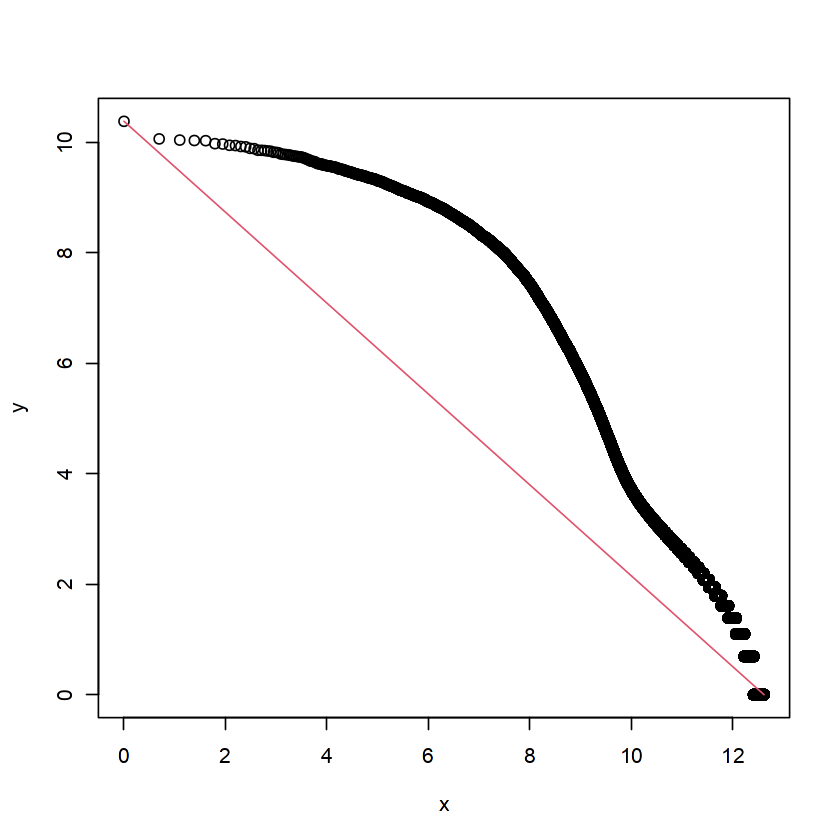

Warning message in create_seurat_object_from_seq_files("7_Article/data/data_osf/GEO061", :
“Des gènes en double ont été trouvés et seront supprimés.”


 [1] "bs-ydzT" "bs-ydzT" "bs-ydzW" "bs-yetI" "bs-panE" "bs-yoyK" "bs-gswA"
 [8] "bs-ypuC" "bs-ispA" "bs-estA" "bs-epsK" "bs-epsJ" "bs-spsC"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Data is of class dgTMatrix. Coercing to dgCMatrix.”


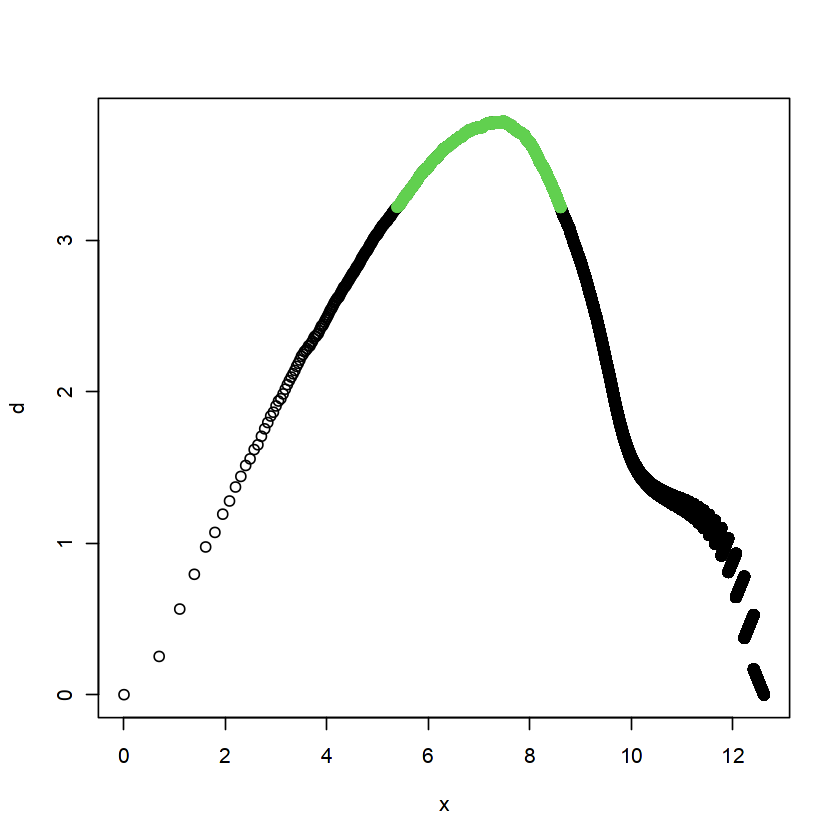

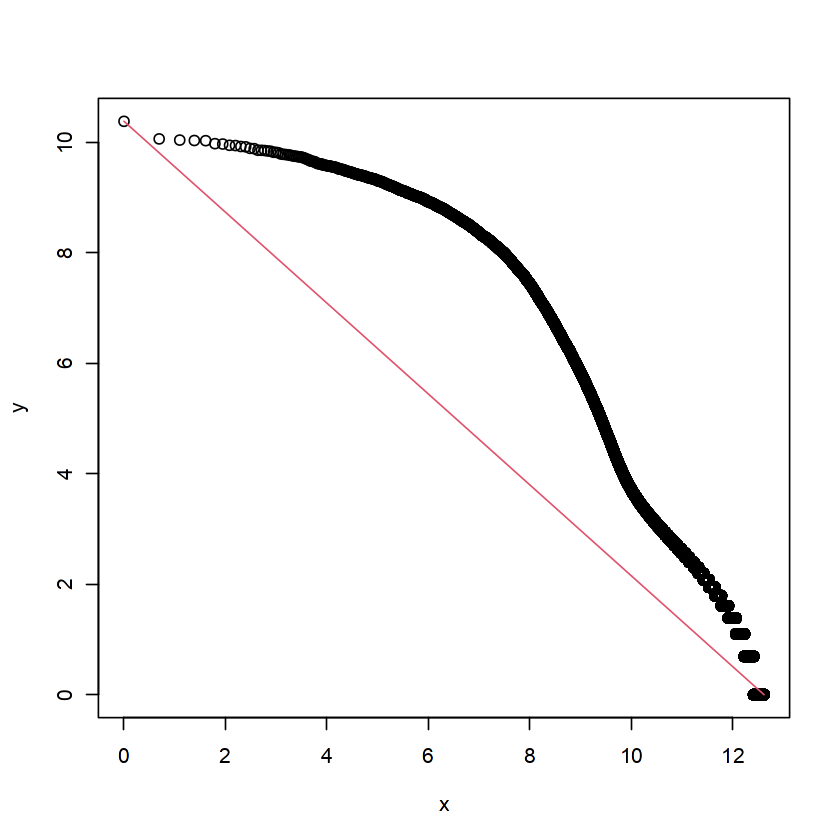

Warning message in create_seurat_object_from_seq_files("7_Article/data/data_osf/GEO061", :
“Des gènes en double ont été trouvés et seront supprimés.”


 [1] "bs-ydzT" "bs-ydzT" "bs-ydzW" "bs-yetI" "bs-panE" "bs-yoyK" "bs-gswA"
 [8] "bs-ypuC" "bs-ispA" "bs-estA" "bs-epsK" "bs-epsJ" "bs-spsC"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Data is of class dgTMatrix. Coercing to dgCMatrix.”


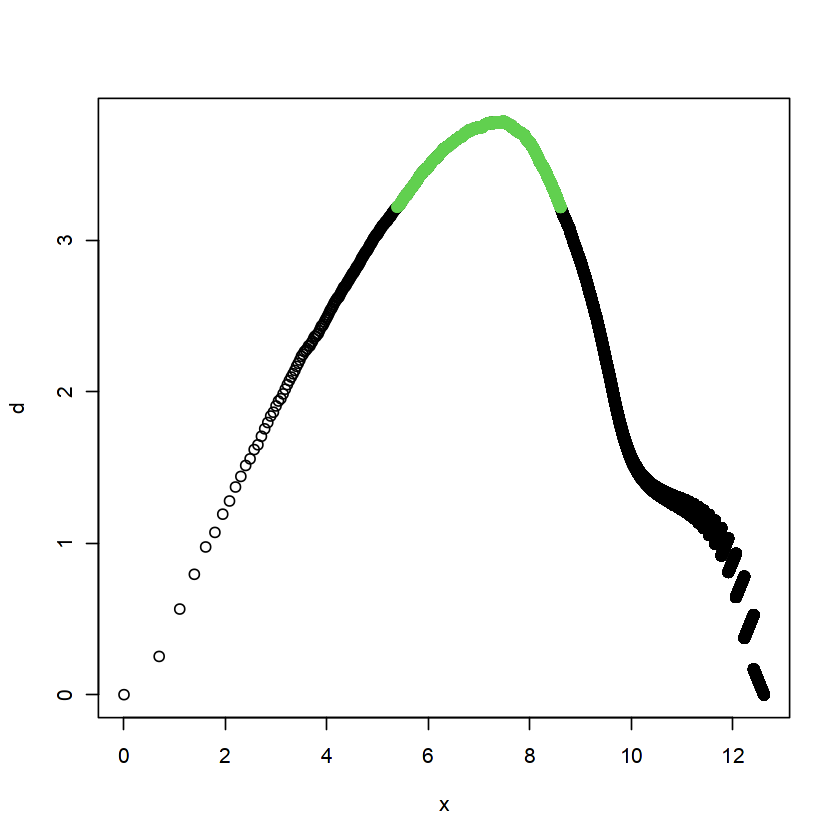

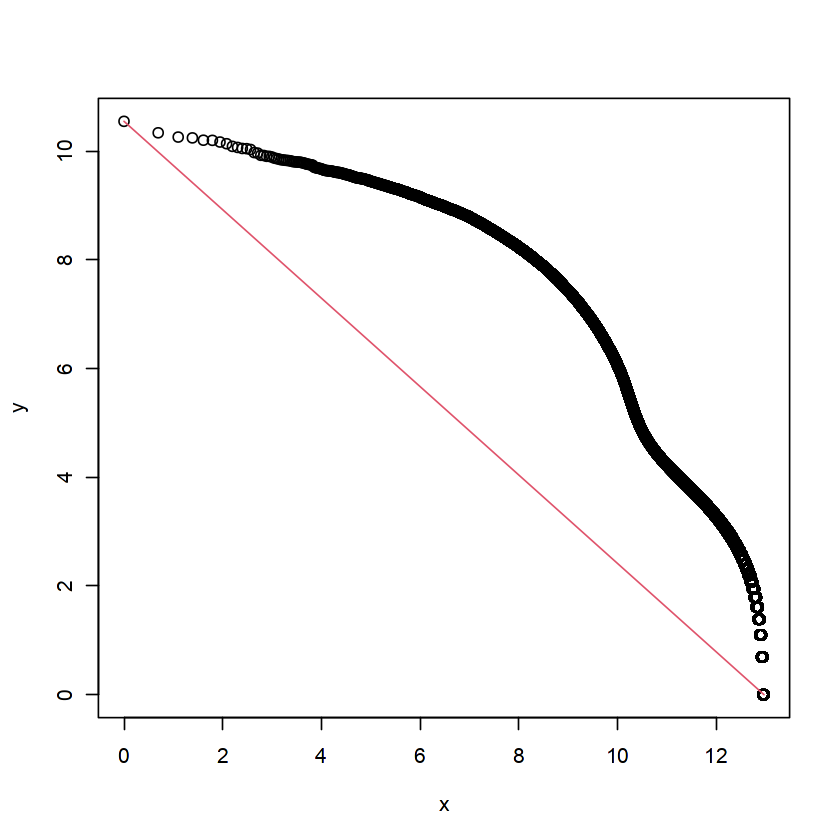

Warning message in create_seurat_object_from_seq_files("7_Article/data/data_osf/GEO660", :
“Des gènes en double ont été trouvés et seront supprimés.”


 [1] "bs-ydzT" "bs-ydzT" "bs-ydzW" "bs-yetI" "bs-panE" "bs-yoyK" "bs-gswA"
 [8] "bs-ypuC" "bs-ispA" "bs-estA" "bs-epsK" "bs-epsJ" "bs-spsC"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Data is of class dgTMatrix. Coercing to dgCMatrix.”


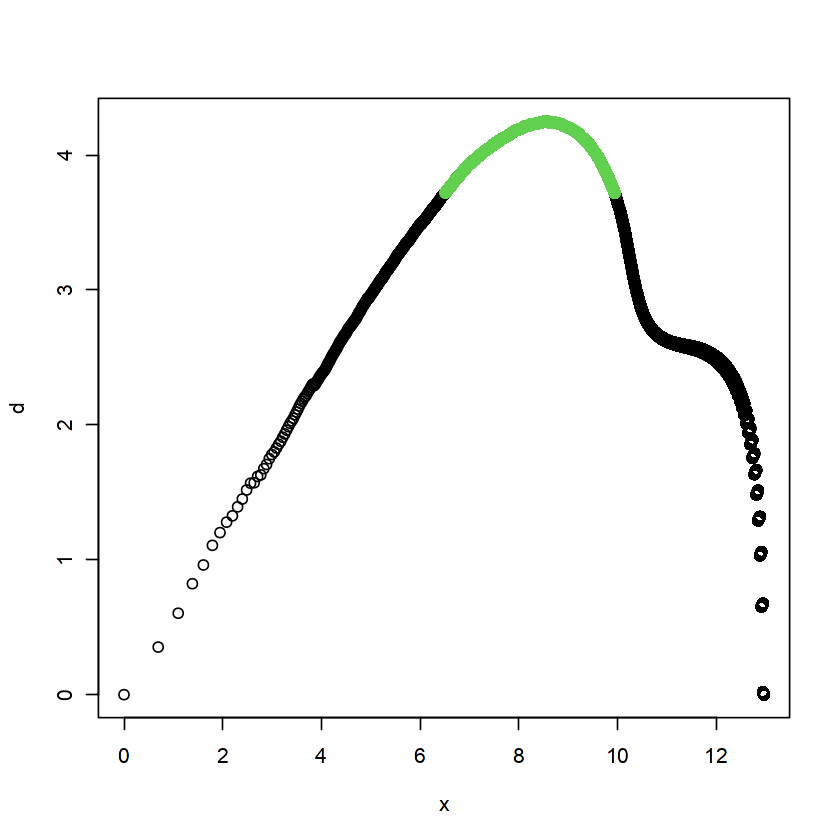

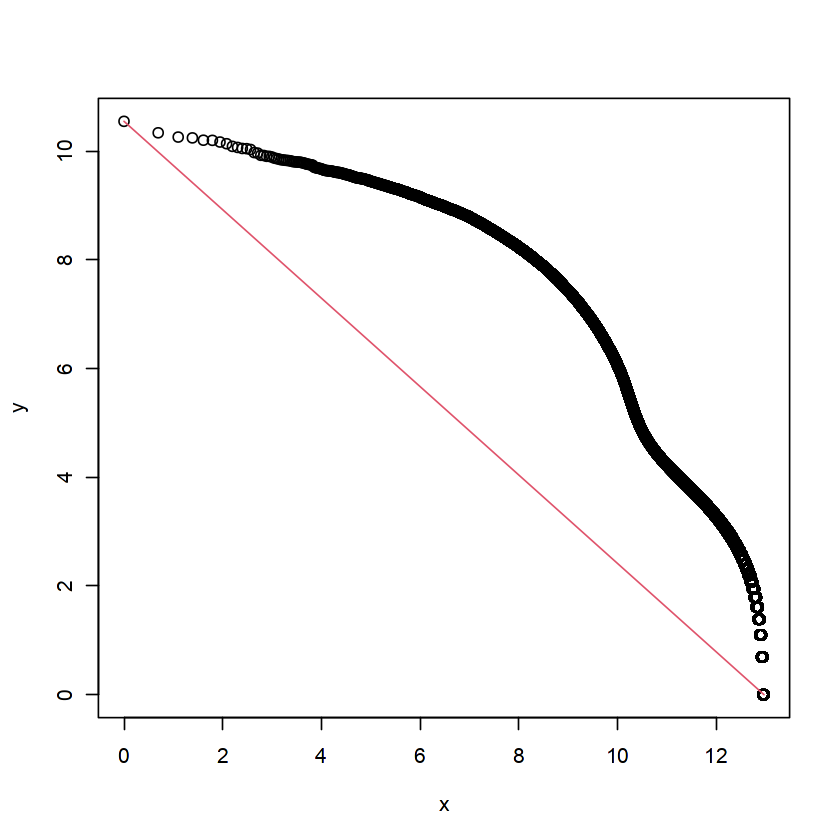

Warning message in create_seurat_object_from_seq_files("7_Article/data/data_osf/GEO660", :
“Des gènes en double ont été trouvés et seront supprimés.”


 [1] "bs-ydzT" "bs-ydzT" "bs-ydzW" "bs-yetI" "bs-panE" "bs-yoyK" "bs-gswA"
 [8] "bs-ypuC" "bs-ispA" "bs-estA" "bs-epsK" "bs-epsJ" "bs-spsC"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Data is of class dgTMatrix. Coercing to dgCMatrix.”


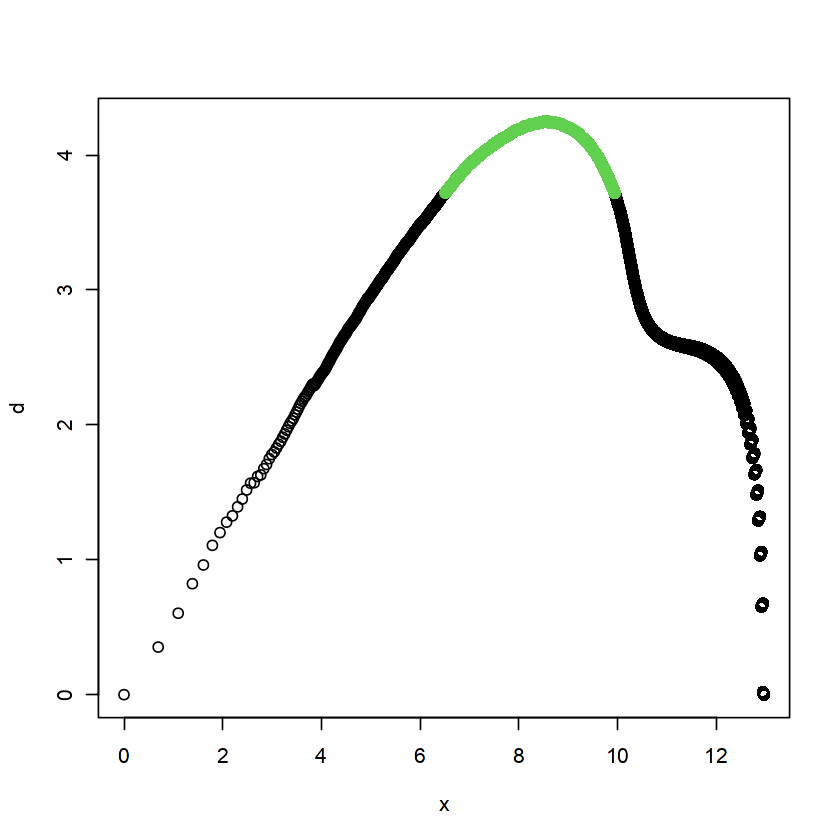

In [12]:

### Création des objets Seurat pour les données de séquençage de B. subtilis

#GEO661 <- create_seurat_object_from_seq_files('C:/Users/lbrettne/Desktop/GEO661 Solo.out/bacillus_only/GeneFull/raw/','M15','none',0.85) # avec ribosome 


#B. subtilis replicate 1 
GEO661 <- create_seurat_object_from_seq_files('7_Article/data/data_osf/GEO061','M15','none',0.85) # avec ribosome 
GEO661.nr <- create_seurat_object_from_seq_files('7_Article/data/data_osf/GEO061','M15','rRNA',0.85) # sans ribosome

#B. subtilis replicate 2
GEO660 <- create_seurat_object_from_seq_files('7_Article/data/data_osf/GEO660','M14','none',0.875)
GEO660.nr <- create_seurat_object_from_seq_files('7_Article/data/data_osf/GEO660','M14','rRNA',0.875)


In [26]:
print ("GEO661 results : ")
GEO661 
head(GEO661@meta.data)
dim(GEO661@meta.data)  # Vérifie le nombre de cellules et de colonnes
colnames(GEO661@meta.data)  # Liste les colonnes disponibles


GEO661.nr 
head(GEO661.nr@meta.data)
dim(GEO661.nr@meta.data)  # Vérifie le nombre de cellules et de colonnes
colnames(GEO661.nr@meta.data)  # Liste les colonnes disponibles


print ("GEO660 results : ")
GEO660 
head(GEO660@meta.data)
dim(GEO660@meta.data)  # Vérifie le nombre de cellules et de colonnes
colnames(GEO660@meta.data)  # Liste les colonnes disponibles


GEO660.nr 
head(GEO660.nr@meta.data)
dim(GEO660.nr@meta.data)  # Vérifie le nombre de cellules et de colonnes
colnames(GEO660.nr@meta.data)  # Liste les colonnes disponibles




[1] "GEO661 results : "


An object of class Seurat 
4402 features across 5461 samples within 1 assay 
Active assay: RNA (4402 features, 0 variable features)
 1 layer present: counts

,orig.ident,nCount_RNA,nFeature_RNA,well,sublibrary
,<fct>,<dbl>,<int>,<chr>,<chr>
AACAACCA_CCGACAAC_ACTCGTAA,AACAACCA,4001.667,356,A1,M15
AACCGAGA_GTGTTCTA_ACTCGTAA,AACCGAGA,14979.004,830,A1,M15
AACGTGAT_TATCAGCA_ACTCGTAA,AACGTGAT,2013.501,197,A1,M15
AACTCACC_GACTAGTA_ACTCGTAA,AACTCACC,1622.667,169,A1,M15
AACTCACC_GTACGCAA_ACTCGTAA,AACTCACC,8802.000,582,A1,M15
AAGAGATC_CGCATACA_ACTCGTAA,AAGAGATC,1077.417,140,A1,M15


[1] 5461    5

[1] "orig.ident"   "nCount_RNA"   "nFeature_RNA" "well"         "sublibrary"

An object of class Seurat 
4493 features across 5461 samples within 1 assay 
Active assay: RNA (4493 features, 0 variable features)
 1 layer present: counts

,orig.ident,nCount_RNA,nFeature_RNA,well,sublibrary
,<fct>,<dbl>,<int>,<chr>,<chr>
AACAACCA_CCGACAAC_ACTCGTAA,AACAACCA,402.2537,336,A1,M15
AACCGAGA_GTGTTCTA_ACTCGTAA,AACCGAGA,1492.1321,801,A1,M15
AACGTGAT_TATCAGCA_ACTCGTAA,AACGTGAT,183.7611,177,A1,M15
AACTCACC_GACTAGTA_ACTCGTAA,AACTCACC,155.4886,150,A1,M15
AACTCACC_GTACGCAA_ACTCGTAA,AACTCACC,907.3934,553,A1,M15
AAGAGATC_CGCATACA_ACTCGTAA,AAGAGATC,109.6639,121,A1,M15


[1] 5461    5

[1] "orig.ident"   "nCount_RNA"   "nFeature_RNA" "well"         "sublibrary"

[1] "GEO660 results : "


An object of class Seurat 
4521 features across 20871 samples within 1 assay 
Active assay: RNA (4521 features, 0 variable features)
 1 layer present: counts

,orig.ident,nCount_RNA,nFeature_RNA,well,sublibrary
,<fct>,<dbl>,<int>,<chr>,<chr>
AAACATCG_AGCAGGAA_ACTCGTAA,AAACATCG,3910.0015,408,A1,M14
AAACATCG_CGAACTTA_ACTCGTAA,AAACATCG,6883.8572,578,A1,M14
AAACATCG_TCTTCACA_ACTCGTAA,AAACATCG,2105.9994,250,A1,M14
AAACATCG_TGGCTTCA_ACTCGTAA,AAACATCG,848.9996,142,A1,M14
AACAACCA_AAGACGGA_ACTCGTAA,AACAACCA,5214.9994,482,A1,M14
AACAACCA_ACATTGGC_ACTCGTAA,AACAACCA,3331.0000,356,A1,M14


[1] 20871     5

[1] "orig.ident"   "nCount_RNA"   "nFeature_RNA" "well"         "sublibrary"

An object of class Seurat 
4493 features across 20871 samples within 1 assay 
Active assay: RNA (4493 features, 0 variable features)
 1 layer present: counts

,orig.ident,nCount_RNA,nFeature_RNA,well,sublibrary
,<fct>,<dbl>,<int>,<chr>,<chr>
AAACATCG_AGCAGGAA_ACTCGTAA,AAACATCG,549.4310,379,A1,M14
AAACATCG_CGAACTTA_ACTCGTAA,AAACATCG,814.7206,548,A1,M14
AAACATCG_TCTTCACA_ACTCGTAA,AAACATCG,253.0189,229,A1,M14
AAACATCG_TGGCTTCA_ACTCGTAA,AAACATCG,118.4298,122,A1,M14
AACAACCA_AAGACGGA_ACTCGTAA,AACAACCA,796.8236,462,A1,M14
AACAACCA_ACATTGGC_ACTCGTAA,AACAACCA,451.6707,336,A1,M14


[1] 20871     5

[1] "orig.ident"   "nCount_RNA"   "nFeature_RNA" "well"         "sublibrary"

In [27]:
# assigne les metadonnées de densité optique aux cellules


growcurvb.m15 <- assign_metadata_bacteria_M15(GEO661)
growcurvb.nr.m15 <- assign_metadata_bacteria_M15(GEO661.nr)

#repeat for replicate 2
growcurvb.m14 <- assign_metadata_bacteria_M14(GEO660)
growcurvb.nr.m14 <- assign_metadata_bacteria_M14(GEO660.nr)


# #subset data into individual timepoints
# OD0.5.m15 <- subset(growcurvb.m15, subset = cond == "OD0.5")
# OD1.0.m15 <- subset(growcurvb.m15, subset = cond == "OD1.0")
# OD1.3.m15 <- subset(growcurvb.m15, subset = cond == "OD1.3")
# OD1.6.m15 <- subset(growcurvb.m15, subset = cond == "OD1.6")
# OD2.8.m15 <- subset(growcurvb.m15, subset = cond == "OD2.8")
# OD3.6.m15 <- subset(growcurvb.m15, subset = cond == "OD3.6")
# OD5.3.m15 <- subset(growcurvb.m15, subset = cond == "OD5.3")
# OD6.0.m15 <- subset(growcurvb.m15, subset = cond == "OD6.0")

# #subset data minus rRNA into individual timepoints
# OD0.5.nr.m15 <- subset(growcurvb.nr.m15, subset = cond == "OD0.5")
# OD1.0.nr.m15 <- subset(growcurvb.nr.m15, subset = cond == "OD1.0")
# OD1.3.nr.m15 <- subset(growcurvb.nr.m15, subset = cond == "OD1.3")
# OD1.6.nr.m15 <- subset(growcurvb.nr.m15, subset = cond == "OD1.6")
# OD2.8.nr.m15 <- subset(growcurvb.nr.m15, subset = cond == "OD2.8")
# OD3.6.nr.m15 <- subset(growcurvb.nr.m15, subset = cond == "OD3.6")
# OD5.3.nr.m15 <- subset(growcurvb.nr.m15, subset = cond == "OD5.3")
# OD6.0.nr.m15 <- subset(growcurvb.nr.m15, subset = cond == "OD6.0")



# #subset data into individual timepoints
# OD0.5.m14 <- subset(growcurvb.m14, subset = cond == "OD0.5")
# OD1.0.m14 <- subset(growcurvb.m14, subset = cond == "OD1.0")
# OD1.7.m14 <- subset(growcurvb.m14, subset = cond == "OD1.7")
# OD2.0.m14 <- subset(growcurvb.m14, subset = cond == "OD2.0")
# OD2.8.m14 <- subset(growcurvb.m14, subset = cond == "OD2.8")
# OD3.2.m14 <- subset(growcurvb.m14, subset = cond == "OD3.2")


# #subset data minus rRNA into individual timepoints
# OD0.5.nr.m14 <- subset(growcurvb.nr.m14, subset = cond == "OD0.5")
# OD1.0.nr.m14 <- subset(growcurvb.nr.m14, subset = cond == "OD1.0")
# OD1.7.nr.m14 <- subset(growcurvb.nr.m14, subset = cond == "OD1.7")
# OD2.0.nr.m14 <- subset(growcurvb.nr.m14, subset = cond == "OD2.0")
# OD2.8.nr.m14 <- subset(growcurvb.nr.m14, subset = cond == "OD2.8")
# OD3.2.nr.m14 <- subset(growcurvb.nr.m14, subset = cond == "OD3.2")





Warning message:
“Some cell names are duplicated across objects provided. Renaming to enforce unique cell names.”
Warning message:
“Some cell names are duplicated across objects provided. Renaming to enforce unique cell names.”


In [28]:
#Test d'affichage des données

growcurvb.m15 
head(growcurvb.m15@meta.data)
dim(growcurvb.m15@meta.data)  # Vérifie le nombre de cellules et de colonnes
colnames(growcurvb.m15@meta.data)  # Liste les colonnes disponibles


An object of class Seurat 
4402 features across 5461 samples within 1 assay 
Active assay: RNA (4402 features, 0 variable features)
 48 layers present: counts.1.1, counts.1.2, counts.1.3, counts.1.4, counts.1.5, counts.1.6, counts.1.7, counts.1.8, counts.2.1, counts.2.2, counts.2.3, counts.2.4, counts.2.5, counts.2.6, counts.2.7, counts.2.8, counts.3.1, counts.3.2, counts.3.3, counts.3.4, counts.3.5, counts.3.6, counts.3.7, counts.3.8, counts.4.1, counts.4.2, counts.4.3, counts.4.4, counts.4.5, counts.4.6, counts.4.7, counts.4.8, counts.5.1, counts.5.2, counts.5.3, counts.5.4, counts.5.5, counts.5.6, counts.5.7, counts.5.8, counts.6.1, counts.6.2, counts.6.3, counts.6.4, counts.6.5, counts.6.6, counts.6.7, counts.6.8

,orig.ident,nCount_RNA,nFeature_RNA,well,sublibrary,cond
,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>
AACAACCA_CCGACAAC_ACTCGTAA,AACAACCA,4001.667,356,A1,M15,OD0.5
AACCGAGA_GTGTTCTA_ACTCGTAA,AACCGAGA,14979.004,830,A1,M15,OD0.5
AACGTGAT_TATCAGCA_ACTCGTAA,AACGTGAT,2013.501,197,A1,M15,OD0.5
AACTCACC_GACTAGTA_ACTCGTAA,AACTCACC,1622.667,169,A1,M15,OD0.5
AACTCACC_GTACGCAA_ACTCGTAA,AACTCACC,8802.000,582,A1,M15,OD0.5
AAGAGATC_CGCATACA_ACTCGTAA,AAGAGATC,1077.417,140,A1,M15,OD0.5


[1] 5461    6

[1] "orig.ident"   "nCount_RNA"   "nFeature_RNA" "well"         "sublibrary"  
[6] "cond"

In [15]:


#fonction pour normaliser 


#normalize and scale mRNA datasets
scale_normalize_seurat_data <- function(seuratobject, nvariableFeatures, npcs, features){
  
  integrated <- NormalizeData(seuratobject, verbose = FALSE)
  integrated <- FindVariableFeatures(integrated, selection.method = "vst", 
                                     nfeatures = nvariableFeatures, verbose = FALSE)
  
  integrated <- ScaleData(integrated, verbose = FALSE)
  integrated <- RunPCA(integrated, npcs = npcs, verbose = FALSE, features = features)
  #integrated <- JackStraw(integrated)
  #integrated <- ScoreJackStraw(integrated, dims = 1:npcs)
  #p <- plot_grid(ElbowPlot(integrated), JackStrawPlot(integrated, dims = 1:npcs))
  p <- ElbowPlot(integrated)
  print(p)
  return(integrated)
}


# La fonction scale_normalize_seurat_data() effectue les étapes suivantes sur un objet Seurat :
# 	1.	Normalisation des données → NormalizeData()
# 	•	Transforme les valeurs d’expression des gènes en CPM (Counts Per Million).
# 	•	Applique une normalisation logarithmique (LogNormalize par défaut).
# 	2.	Identification des gènes les plus variables → FindVariableFeatures()
# 	•	Sélectionne les nvariableFeatures gènes les plus variables avec la méthode vst (Variance Stabilizing Transformation).
# 	3.	Mise à l’échelle des données → ScaleData()
# 	•	Centre chaque gène sur une moyenne de 0.
# 	•	Met à l’échelle les valeurs d’expression avec un écart-type de 1.
# 	4.	Analyse en Composantes Principales (PCA) → RunPCA()
# 	•	Effectue une PCA sur npcs composantes principales.
# 	•	Utilise les features spécifiés ou, si features = NULL, les gènes variables détectés.
# 	5.	Affichage d’un Elbow Plot → ElbowPlot()
# 	•	Génère un Elbow Plot pour visualiser le nombre optimal de composantes à conserver.
# 	6.	Retourne l’objet Seurat modifié contenant les résultats de la normalisation, du scaling et de la PCA.

# 💡 Résumé :
# 👉 Normalise les données → Sélectionne les gènes variables → Met à l’échelle → Effectue une PCA → Affiche un Elbow Plot.




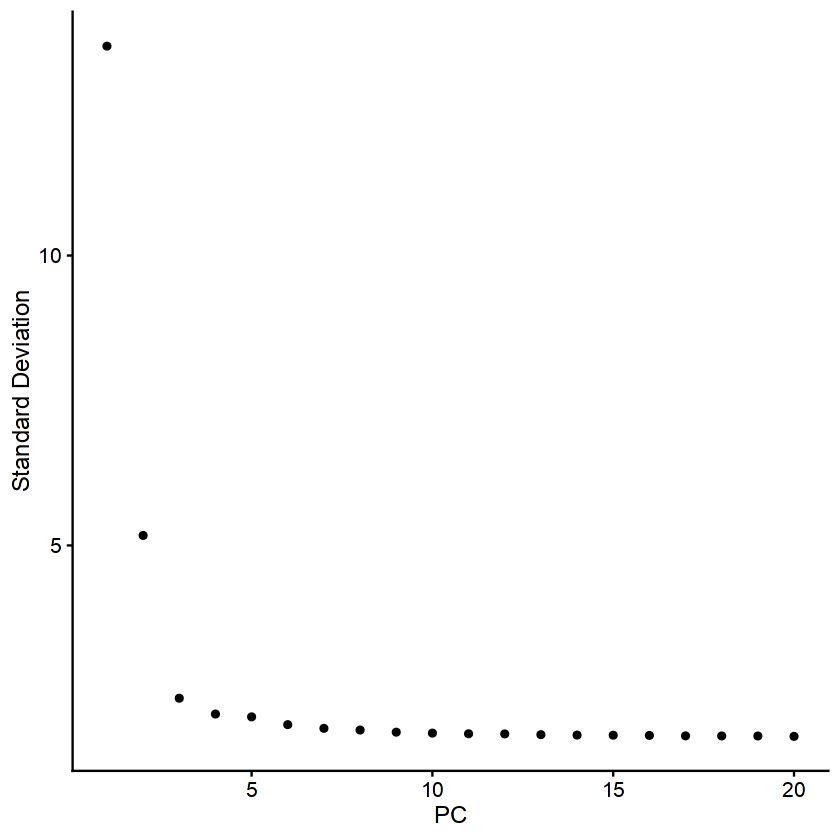

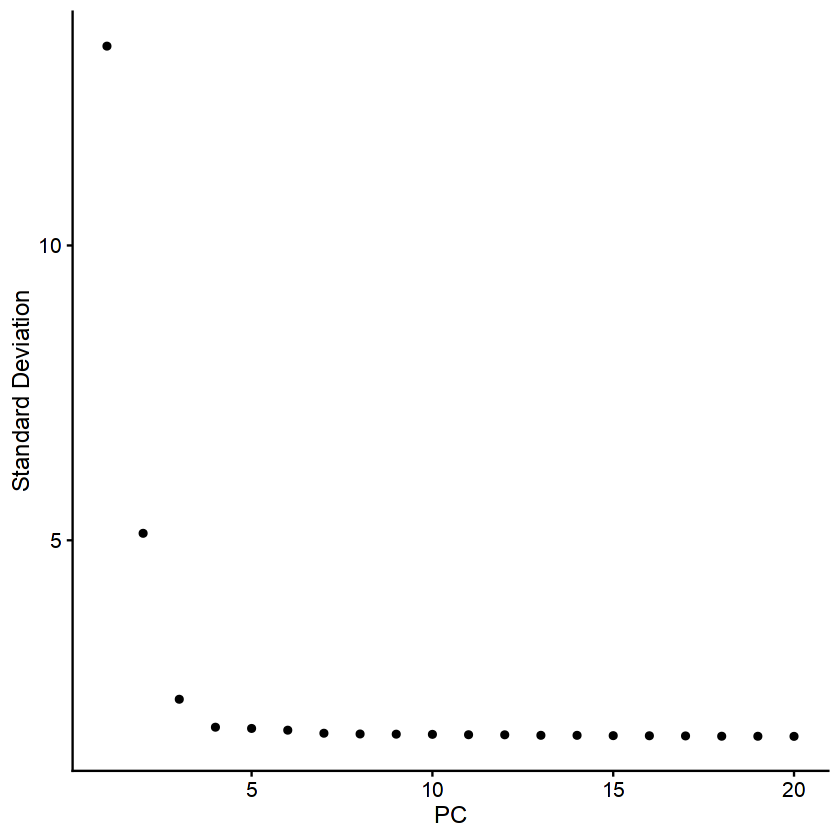

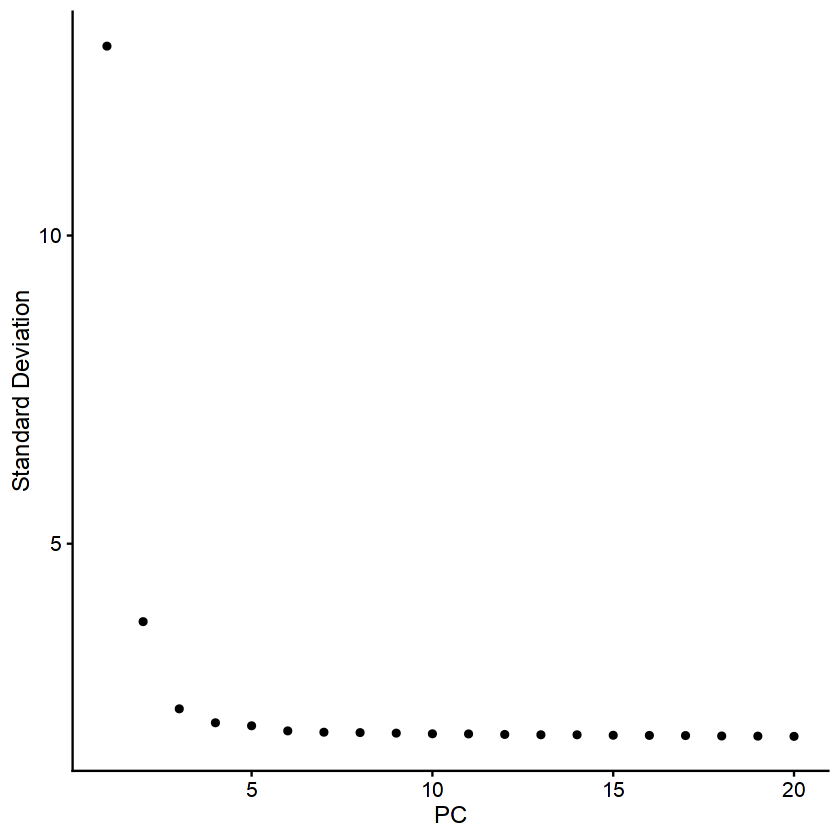

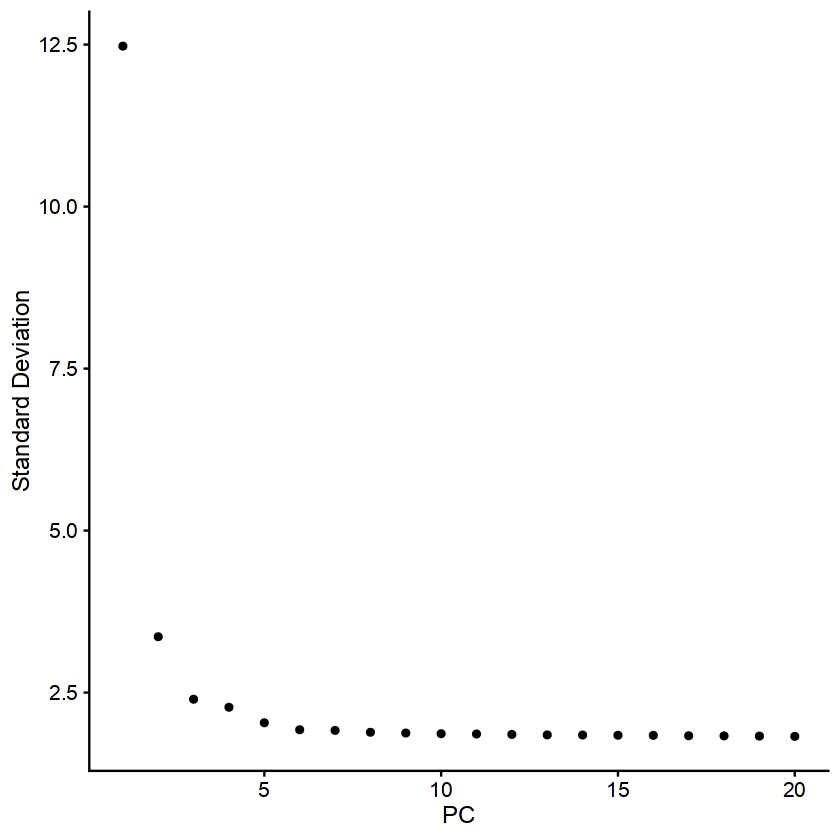

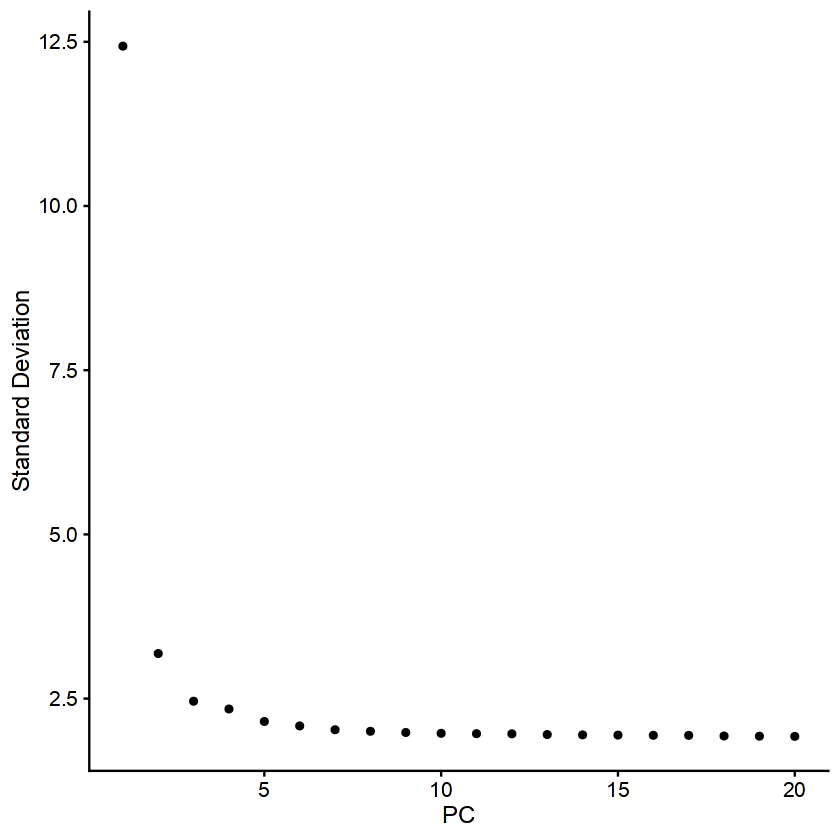

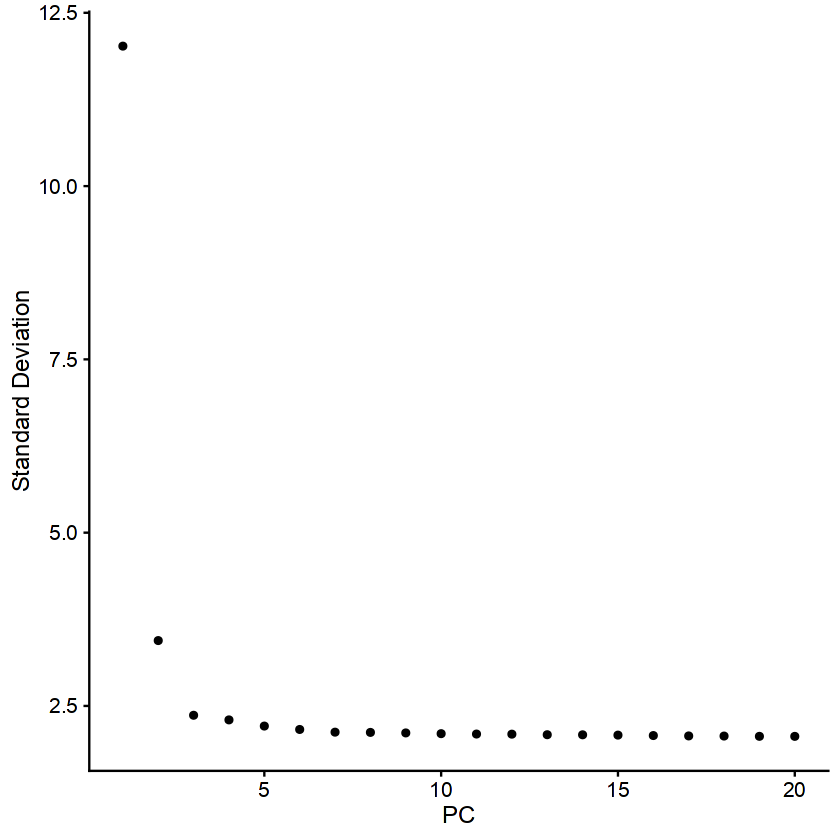

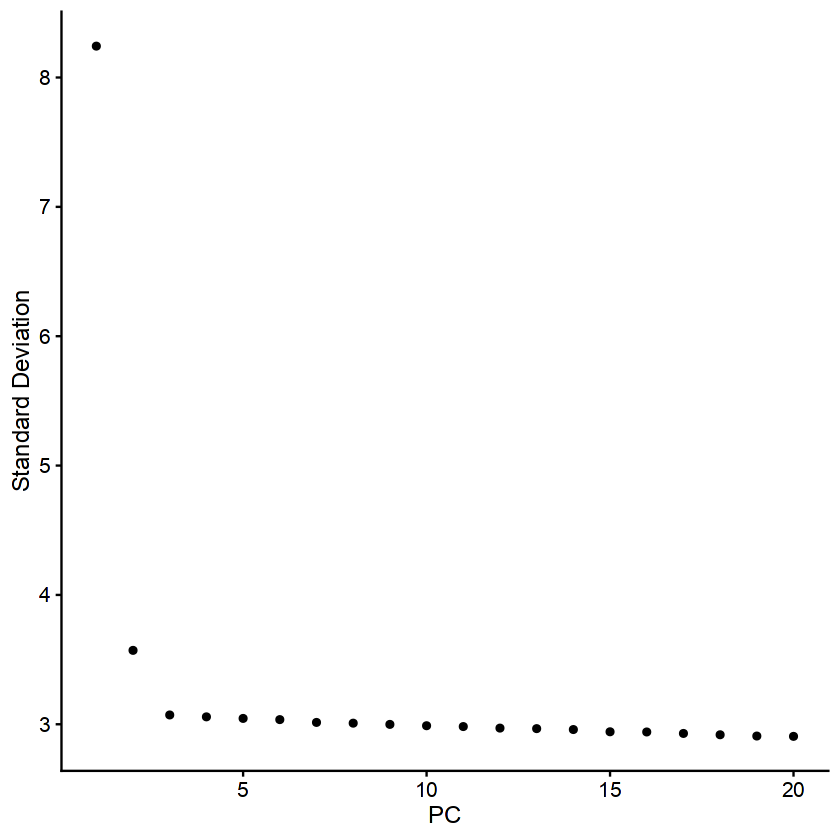

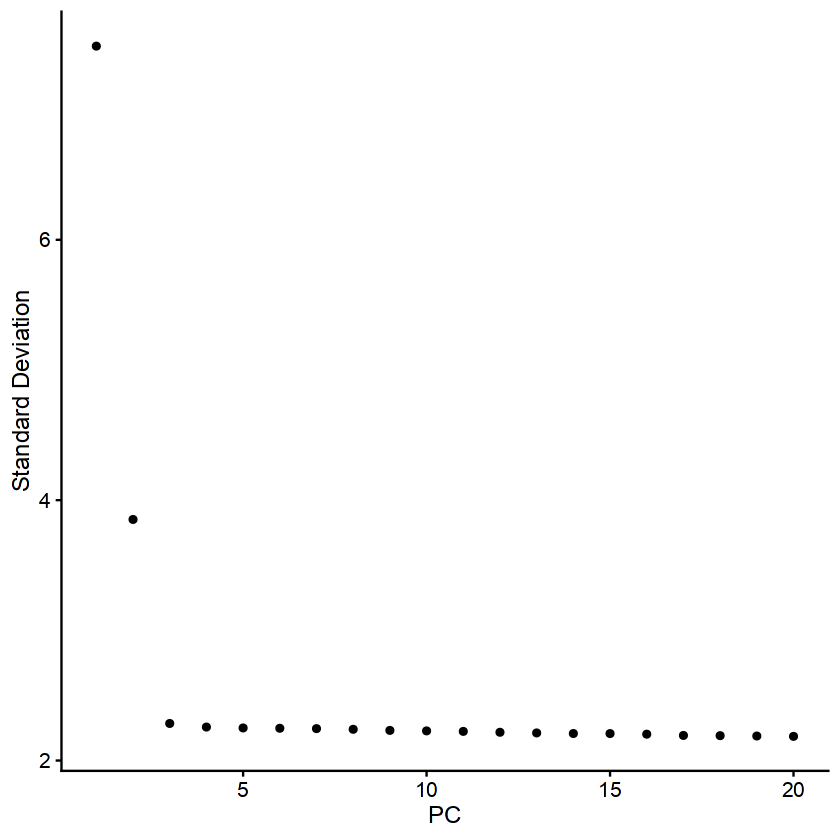

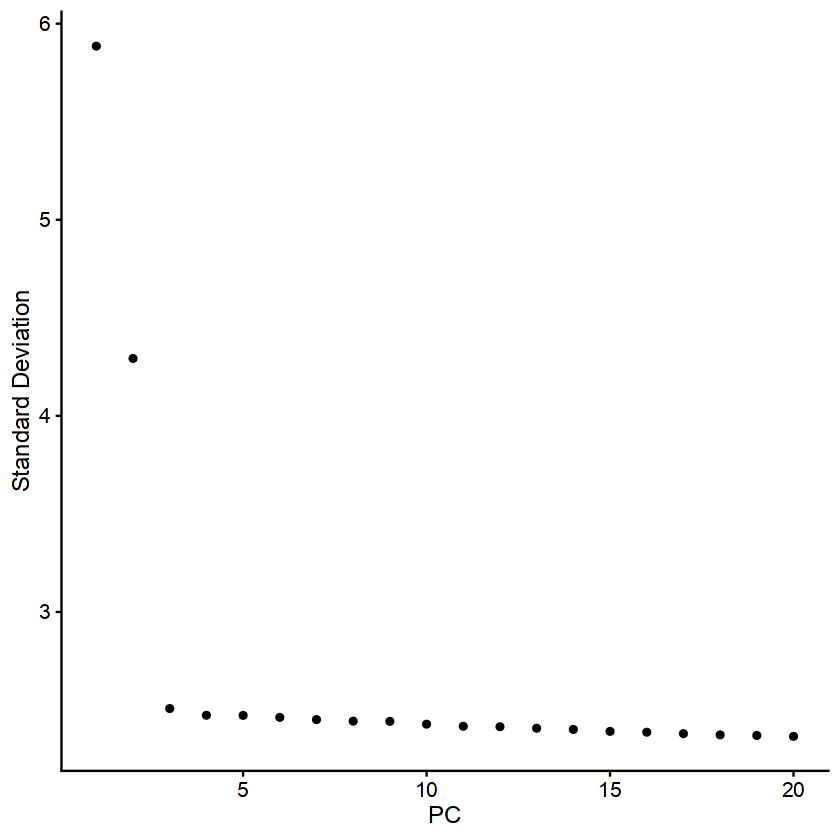

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“zero-width neighborhood. make span bigger”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.69897”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 4.3429e-07”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“zero-width neighborhood. make span bigger”


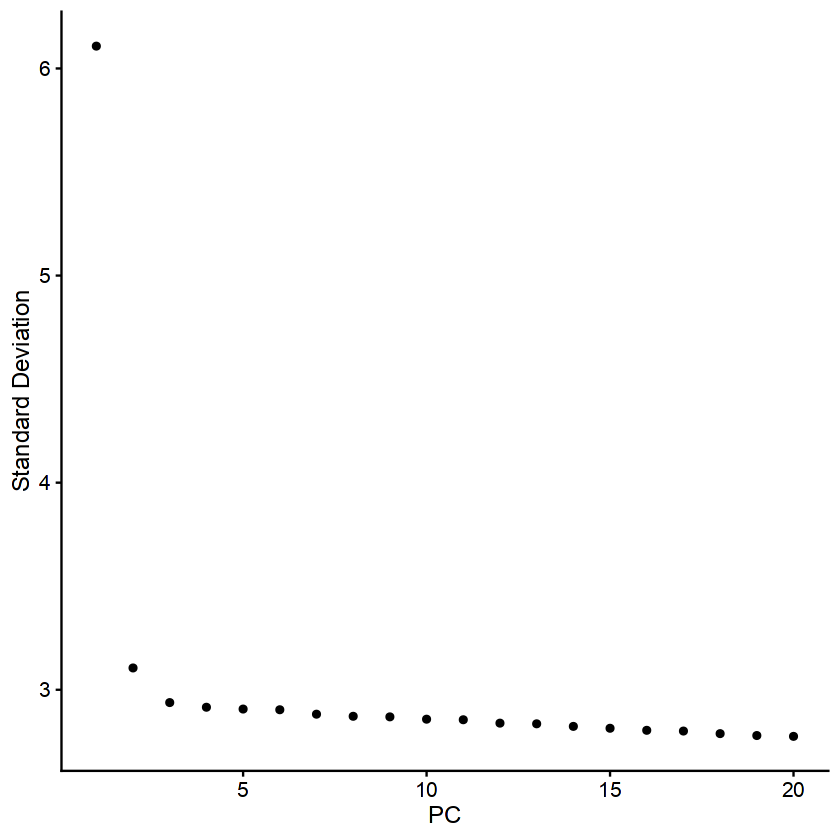

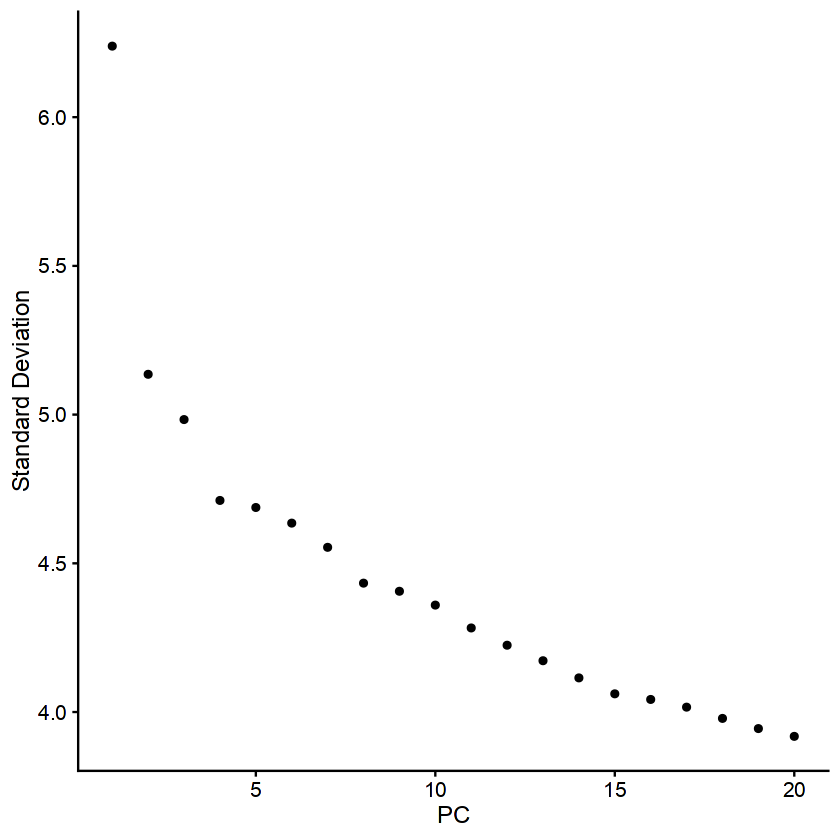

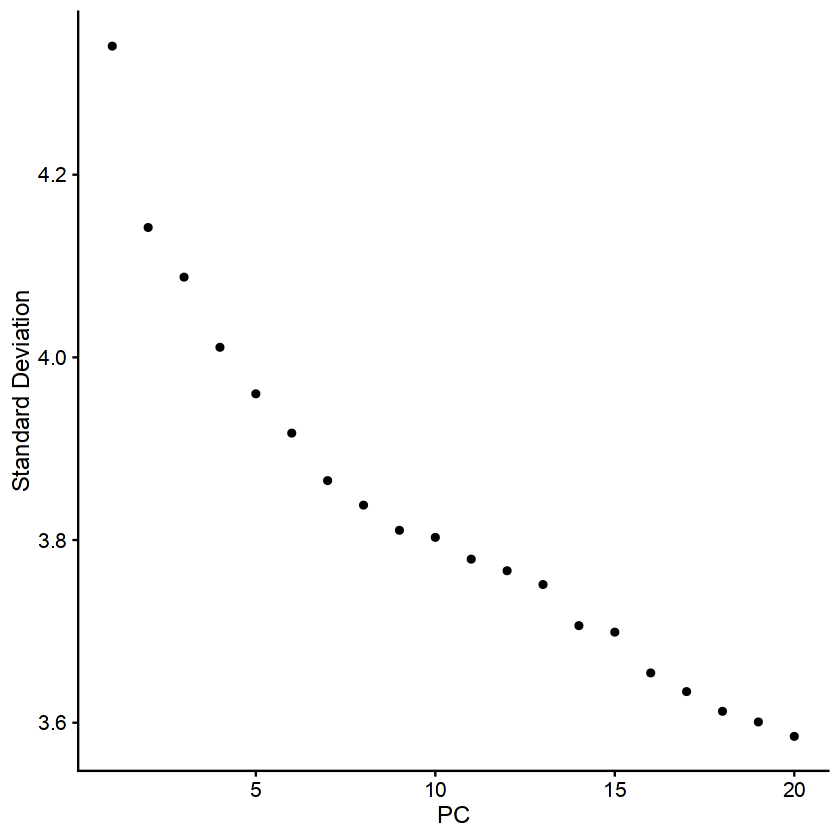

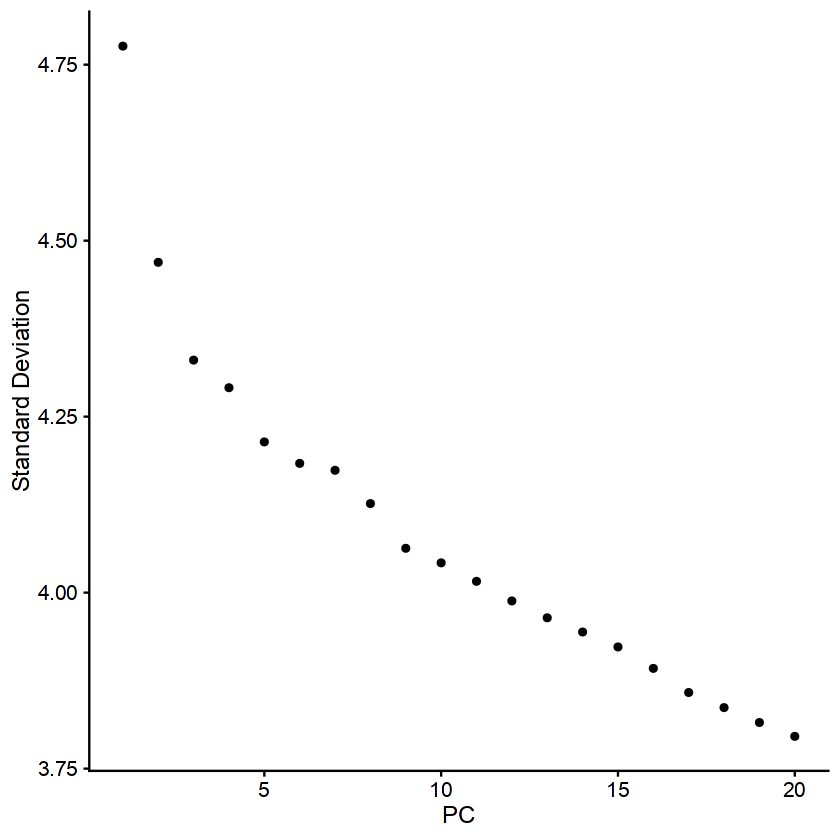

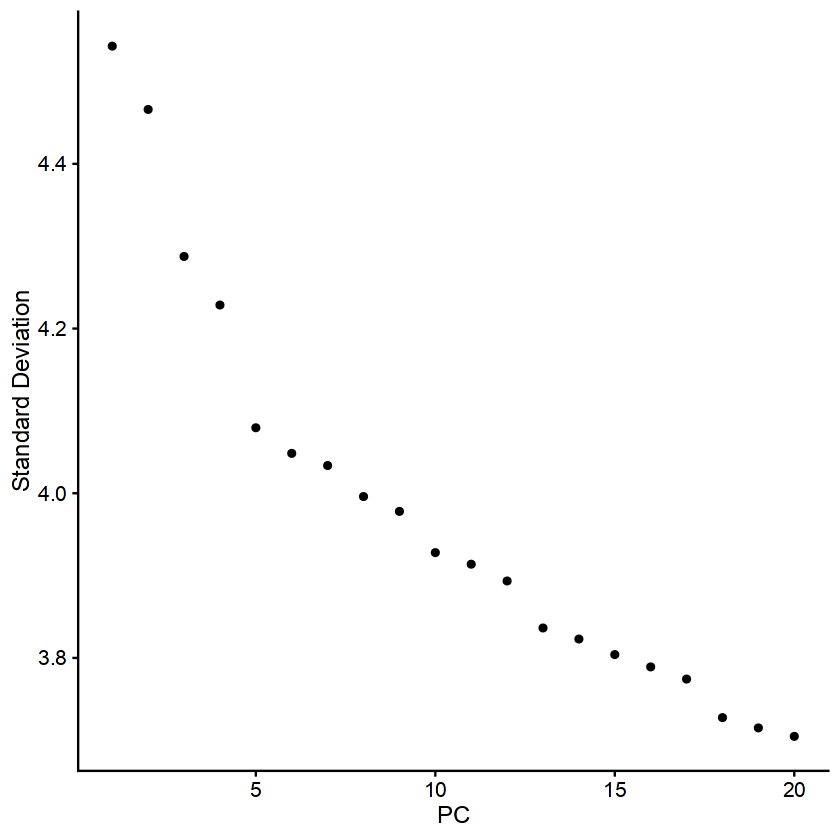

In [16]:


#Utilisation de la focnrtion scale_normalize_seurat_data pour normaliser et mettre à l'échelle les données de séquençage de B. subtilis

OD0.5.nr.m14.int <- scale_normalize_seurat_data(OD0.5.nr.m14, 3000, 20, NULL)
OD1.0.nr.m14.int <- scale_normalize_seurat_data(OD1.0.nr.m14, 3000, 20, NULL)
OD1.7.nr.m14.int <- scale_normalize_seurat_data(OD1.7.nr.m14, 3000, 20, NULL)
OD2.0.nr.m14.int <- scale_normalize_seurat_data(OD2.0.nr.m14, 3000, 20, NULL)
OD2.8.nr.m14.int <- scale_normalize_seurat_data(OD2.8.nr.m14, 3000, 20, NULL)
OD3.2.nr.m14.int <- scale_normalize_seurat_data(OD3.2.nr.m14, 3000, 20, NULL)

OD0.5.nr.m15.int <- scale_normalize_seurat_data(OD0.5.nr.m15, 3000, 20, NULL)
OD1.0.nr.m15.int <- scale_normalize_seurat_data(OD1.0.nr.m15, 3000, 20, NULL)
OD1.3.nr.m15.int <- scale_normalize_seurat_data(OD1.3.nr.m15, 3000, 20, NULL)
OD1.6.nr.m15.int <- scale_normalize_seurat_data(OD1.6.nr.m15, 3000, 20, NULL)
OD2.8.nr.m15.int <- scale_normalize_seurat_data(OD2.8.nr.m15, 3000, 20, NULL)
OD3.6.nr.m15.int <- scale_normalize_seurat_data(OD3.6.nr.m15, 3000, 20, NULL)
OD5.3.nr.m15.int <- scale_normalize_seurat_data(OD5.3.nr.m15, 3000, 20, NULL)
OD6.0.nr.m15.int <- scale_normalize_seurat_data(OD6.0.nr.m15, 3000, 20, NULL)




In [23]:

#calculate counts and statistics for RNA types, including rRNA, mRNA, etc.
assign_RNA_types_b <- function(SO, SO2, group_name, timepoint) {
  ribosomes <- read.csv('7_Article/script/utile_bact/bacteria.ribosomes.csv')
  colnames(ribosomes) = c("name","type")
  rRNA.genes <- ribosomes[which(ribosomes$type == 'rRNA'),]
  tRNA.genes <- ribosomes[which(ribosomes$type == 'tRNA'),]
  rProt.genes <- ribosomes[which(ribosomes$type == 'rProtein'),]

  class <- read.csv('7_Article/script/utile_bact/bacteria_RP_iESR_RiBi.csv')
  RP.genes <- class[which(class$class == 'RP'),]
  iESR.genes <- class[which(class$class == 'iESR'),]
  RiBi.genes <- class[which(class$class == 'RiBi'),]
  
  RP  <- colSums(SO2@assays$RNA[which(rownames(SO2@assays$RNA) %in% RP.genes$gene),])
  genes_present <- rownames(SO2@assays$RNA) %in% RP.genes$gene
  print(paste("genes present:", sum(genes_present))) # Doit être > 0 sinon aucun gène ne correspond
  rpcv <- sd(RP[which(RP>0)])/mean(RP[which(RP>0)])
  iESR  <- colSums(SO2@assays$RNA[which(rownames(SO2@assays$RNA) %in% iESR.genes$gene),])
  RiBi  <- colSums(SO2@assays$RNA[which(rownames(SO2@assays$RNA) %in% RiBi.genes$gene),])
  totalmRNA <- colSums(SO2@assays$RNA)
  
  SO2$rsect <- 0
  SO2$psect <- 0
  
  for (i in 1:dim(SO2)[2]) {
    
    SO2$rsect[i] <- (RP[i]+RiBi[i])/(RP[i]+RiBi[i]+iESR[i])
    SO2$psect[i] <- (iESR[i])/(RP[i]+RiBi[i]+iESR[i])
    
    
  }
  
  dt <- c(0,1.3509309,1.2972221,1.2699011,1.2351942,1.2072780,1.1572952,1.1383160,1.0740787,0.9988778,0.9714859,0.8519719,0.7547571,0.6883084,0.3290760,0.1606523)
  
  rRNA  <- colSums(SO@assays$RNA[which(rownames(SO@assays$RNA) %in% rRNA.genes$name),])
  tRNA  <- colSums(SO@assays$RNA[which(rownames(SO@assays$RNA) %in% tRNA.genes$name),])
  mRNA  <- SO@assays$RNA[which(!(rownames(SO@assays$RNA) %in% rRNA.genes$name)),]
  #mRNA  <- SO[which(!(rownames(mRNA) %in% tRNA.genes$name)),]
  mRNA  <- colSums(mRNA)
  rProt <- colSums(SO@assays$RNA[which(rownames(SO@assays$RNA) %in% rProt.genes$name),])
  rProt.ratio <- rProt/mRNA
  totalRNA <- colSums(SO@assays$RNA)
  rRNA.ratio <- rRNA/totalRNA
  mRNA.ratio <- mRNA/totalRNA
  mRNA.rRNA <- mRNA/rRNA
  bulkrr <- sum(rRNA)/sum(totalRNA)

  
  bulkrp <- log10(sum(rProt)/sum(totalRNA)*10^6)
  rcv <- sd(rRNA)/mean(rRNA)
  rrcv <- sd(rRNA.ratio)/mean(rRNA.ratio)
  #rpcv <- sd(rProt[which(rProt>0)])/mean(rProt[which(rProt>0)])
  rr.med.dev.med <- median(abs(rRNA - median(rRNA)))
  
  temp <- data.frame(group_name = group_name, 
                     rRNA = rRNA, 
                     tRNA = tRNA, 
                     mRNA = mRNA, 
                     rProt = rProt,
                     totalRNA = totalRNA,
                     rProt.ratio = rProt.ratio,
                     rRNA.ratio = rRNA.ratio,
                     mRNA.ratio = mRNA.ratio,
                     mRNA.rRNA = mRNA.rRNA,
                     bulkrr = bulkrr,
                     #GpH = 1/(dt[timepoint]),
                     GpH = dt[timepoint],
                     bulkrp = bulkrp,
                     rcv = rcv,
                     rpcv = rpcv,
                     rrcv = rrcv,
                     rsd = sd(rRNA),
                     rrsd = sd(rRNA.ratio),
                     rpsd = sd(rProt),
                     rprsd = sd(rProt.ratio),
                     rrm = mean(rRNA),
                     rr.med.dev.med = rr.med.dev.med,
                     rsect = SO2$rsect,
                     psect = SO2$psect)
  
  return(temp)
}

# La fonction assign_RNA_types_b() effectue une analyse des différents types d’ARN présents dans un objet Seurat (SO2) et calcule des statistiques associées. Voici les étapes détaillées :

# 🔹 1. Lecture des fichiers CSV contenant les classifications des ARN
# 	•	Fichier bacteria.ribosomes.csv : Contient une liste de gènes associés aux types d’ARN ribosomiques (rRNA, tRNA, protéines ribosomiques).
# 	•	Stocke les gènes rRNA, tRNA et protéines ribosomiques (rProtein).
# 	•	Fichier bacteria_RP_iESR_RiBi.csv : Contient des classes fonctionnelles des gènes.
# 	•	Sélectionne les gènes appartenant aux catégories :
# 	•	RP (Ribosomal Proteins, protéines ribosomiques).
# 	•	iESR (Immediate Environmental Stress Response, réponse au stress environnemental).
# 	•	RiBi (Ribosome Biogenesis, biogenèse du ribosome).

# 🔹 2. Calcul des sommes d’expression des différents types d’ARN
# 	•	Pour chaque type d’ARN, on somme les comptes d’expression dans l’objet Seurat SO2@assays$RNA :
# 	•	RP → Protéines ribosomiques
# 	•	iESR → Réponse rapide au stress
# 	•	RiBi → Biogenèse des ribosomes
# 	•	totalmRNA → Somme totale de l’expression de tous les ARNs
# 	•	Calcul du coefficient de variation des protéines ribosomiques (rpcv) :
# 	•	rpcv = sd(RP[which(RP>0)]) / mean(RP[which(RP>0)])
# 	•	Permet d’évaluer la variabilité des protéines ribosomiques parmi les cellules analysées.

# 🔹 3. Calcul des ratios rsect et psect pour chaque cellule

# Ces deux scores évaluent l’équilibre entre les différents types d’ARN dans chaque cellule :
# 	•	rsect (Ratio de l’expression ribosomique sur l’ensemble ARN total) :
# ￼
# → Plus la valeur est élevée, plus la cellule est engagée dans la synthèse ribosomique.
# 	•	psect (Ratio d’ARN liés au stress sur l’ensemble ARN total) :
# ￼
# → Plus la valeur est élevée, plus la cellule est engagée dans une réponse au stress.

# Ces valeurs sont calculées pour chaque cellule de SO2.

# 🔹 Résumé des fonctionnalités

# ✅ Lit des fichiers CSV contenant les gènes associés aux protéines ribosomiques, ARN de stress et biogenèse du ribosome.
# ✅ Calcule l’expression totale des différents types d’ARN.
# ✅ Évalue la variabilité de l’expression des protéines ribosomiques (rpcv).
# ✅ Assigne à chaque cellule des scores (rsect, psect) indiquant si elle est plus orientée vers la production ribosomique ou la réponse au stress.

# 🧐 Interprétation
# 	•	Cellules avec un rsect élevé → Fortement engagées dans la production de ribosomes.
# 	•	Cellules avec un psect élevé → En réponse au stress environnemental.

# 💡 Pourquoi c’est utile ?
# 👉 Cette fonction est précieuse pour analyser l’état transcriptionnel des cellules en fonction de leur engagement dans la croissance active (synthèse ribosomique) ou la réponse au stress.





# La fonction assign_RNA_types_b calcule différentes statistiques et totaux pour des types d’ARN spécifiques (comme les rRNA, mRNA, tRNA, etc.) à partir de données d’un objet Seurat (SO) et d’un second objet Seurat (SO2). Voici un résumé détaillé de ce qu’elle fait :

# 1. Lecture des fichiers CSV :
# 	•	La fonction commence par lire deux fichiers CSV qui contiennent des informations sur les types de gènes (ribosomes, protéines ribosomales) et leurs classes (RP, iESR, RiBi), respectivement dans bacteria.ribosomes.csv et bacteria_RP_iESR_RiBi.csv.
# 	•	Ensuite, elle sépare les gènes en fonction de leur type ou classe (rRNA, tRNA, rProtein, RP, iESR, RiBi).

# 2. Calcul des totaux pour les gènes spécifiques :
# 	•	Pour chaque type de gène (RP, iESR, RiBi), la fonction utilise colSums() pour additionner les valeurs d’expression des gènes correspondant dans l’objet SO2.
# 	•	Elle calcule également le total de tous les gènes (totalmRNA).

# 3. Calcul des ratios de sections :
# 	•	Les variables rsect et psect sont calculées pour chaque échantillon à l’aide de ces formules :
# 	•	rsect[i] = (RP + RiBi) / (RP + RiBi + iESR)
# 	•	psect[i] = iESR / (RP + RiBi + iESR)
# 	•	Ces ratios reflètent la proportion des différentes classes de gènes dans chaque échantillon.

# 4. Calcul des autres types d’ARN :
# 	•	Ensuite, elle calcule les totaux pour les gènes associés aux rRNA, tRNA et mRNA en utilisant colSums() pour chaque catégorie de gènes (rRNA, tRNA, rProtein).
# 	•	Les ratios suivants sont calculés pour chaque échantillon :
# 	•	rProt.ratio = rProtéine / mRNA
# 	•	rRNA.ratio = rRNA / totalRNA
# 	•	mRNA.ratio = mRNA / totalRNA
# 	•	mRNA.rRNA = mRNA / rRNA

# 5. Calculs supplémentaires :
# 	•	bulkrr : La proportion globale de rRNA dans l’ARN total.
# 	•	bulkrp : Le log10 de la proportion de protéines ribosomales dans l’ARN total.
# 	•	Diverses autres statistiques sont calculées, comme les coefficients de variation (rcv), les médianes et écarts-types pour les gènes spécifiques.

# 6. Création de la dataframe finale :
# 	•	La fonction crée une dataframe avec toutes les statistiques calculées pour chaque échantillon, en ajoutant aussi des informations sur le groupe (group_name) et les différentes métriques (ratios, écarts-types, médianes, etc.).
# 	•	Elle retourne cette dataframe avec toutes les informations calculées pour un groupe donné à un point temporel spécifique.

# 7. Paramètres :
# 	•	SO: L’objet Seurat principal contenant les données d’expression des gènes (ARN).
# 	•	SO2: Un autre objet Seurat qui est utilisé pour calculer des statistiques supplémentaires basées sur d’autres types de gènes (par exemple, RP, iESR, RiBi).
# 	•	group_name: Le nom du groupe pour lequel les calculs sont effectués.
# 	•	timepoint: Le point temporel pour lequel le calcul de la croissance des cellules est réalisé.

# Résumé global :

# La fonction calcule des statistiques détaillées pour les types d’ARN (rRNA, tRNA, mRNA, etc.), les totaux d’expressions, les ratios spécifiques (par exemple, rProt/mRNA), et des indices de variabilité. Elle utilise ces données pour créer un tableau des métriques pour chaque échantillon à un temps donné et le renvoie sous forme de dataframe.

# Est-ce que cela répond à ta question sur le fonctionnement de cette fonction ? 😊




In [24]:
  
# Calcul des statistiques pour les différents types d'ARN



#Pour le replicate 1

m15OD0.5.RNA <- assign_RNA_types_b(OD0.5.m15, OD0.5.nr.m15.int, "0.5", 4)
m15OD1.0.RNA <- assign_RNA_types_b(OD1.0.m15, OD1.0.nr.m15.int, "1.0", 5)
m15OD1.3.RNA <- assign_RNA_types_b(OD1.3.m15, OD1.3.nr.m15.int, "1.3", 8)
m15OD1.6.RNA <- assign_RNA_types_b(OD1.6.m15, OD1.6.nr.m15.int, "1.6", 9)
m15OD2.8.RNA <- assign_RNA_types_b(OD2.8.m15, OD2.8.nr.m15.int, "2.8", 12)
m15OD3.6.RNA <- assign_RNA_types_b(OD3.6.m15, OD3.6.nr.m15.int, "3.6", 14)
m15OD5.3.RNA <- assign_RNA_types_b(OD5.3.m15, OD5.3.nr.m15.int, "5.3", 15)
m15OD6.0.RNA <- assign_RNA_types_b(OD6.0.m15, OD6.0.nr.m15.int, "6.0", 16)

odRNAb <- rbind(m15OD0.5.RNA,m15OD1.0.RNA,m15OD1.3.RNA,m15OD1.6.RNA,m15OD2.8.RNA,m15OD3.6.RNA,m15OD5.3.RNA,m15OD6.0.RNA)



# Pour le replicate 2

m14OD0.5.RNA <- assign_RNA_types_b(OD0.5.m14, OD0.5.nr.m14.int, "0.5", 4)
m14OD1.0.RNA <- assign_RNA_types_b(OD1.0.m14, OD1.0.nr.m14.int, "1.0", 5)
m14OD1.7.RNA <- assign_RNA_types_b(OD1.7.m14, OD1.7.nr.m14.int, "1.7", 10)
m14OD2.0.RNA <- assign_RNA_types_b(OD2.0.m14, OD2.0.nr.m14.int, "2.0", 11)
m14OD2.8.RNA <- assign_RNA_types_b(OD2.8.m14, OD2.8.nr.m14.int, "2.8", 12)
m14OD3.2.RNA <- assign_RNA_types_b(OD3.2.m14, OD3.2.nr.m14.int, "3.2", 13)

odRNAb.m14 <- rbind(m14OD0.5.RNA,m14OD1.0.RNA,m14OD1.7.RNA,m14OD2.0.RNA,m14OD2.8.RNA,m14OD3.2.RNA)



Warning message:
“Layer ‘117’ is empty”


ERROR: Error in base::colSums(x, na.rm = na.rm, dims = dims, ...): 'x' must be an array of at least two dimensions


In [ ]:

#--Figure 1-----------------------------------------------------------------------------



doublingrate <- function(fit, x, t){
  drs <- c()
  for (i in 2:length(fit)){
    dr <- log2(fit[i]/fit[i-1])/(x[i]-x[i-1])
    drs <- c(drs,dr)
  }
  
  grs <- c()
  for (j in 2:length(t)){
    k <- which.min(abs(x - t[j]))
    gr <- drs[k]
    grs <- c(grs, gr)
  }
  return(grs)
}



#bacteria
hour  <- c(0.00,1.10,2.13,2.45,2.75,2.90,3.18,3.28,3.60,3.93,4.0,4.42,4.67,4.95,6.12,6.97) #Kuchina and Brettner et al. 2021 (Science)
OD600 <- c(0.02,0.04,0.27,0.49,0.94,0.93,1.16,1.34,1.58,1.76,2.0,2.87,3.20,3.56,5.31,6.34)

fitb <- nls(OD600 ~ L/(1+exp(-k*(hour - x0))), start = list(L = 6, k = 0.5, x0 = 3))
Lb  <- summary(fitb)$parameters[1,1]
kb  <- summary(fitb)$parameters[2,1]
x0b <- summary(fitb)$parameters[3,1]
xb <- seq(from = 0, to = 8, by = 0.1)
fitb <- Lb/(1+exp(-kb*(xb - x0b)))

GpHb <- doublingrate(fitb,xb,xb)
GpHb <- data.frame(t = xb[-1], gph = GpHb)
GpHb_data <- doublingrate(fitb,xb,hour)
GpHb_data <- data.frame(t = hour[c(4,5,8,9,12,13,14,15)], gph = GpHb_data[c(3,4,7,8,11,12,13,14)])

cell_density <- data.frame(t = xb, cpml = fitb)
cell_dens_data <- data.frame(t = hour[c(4,5,8,9,12,13,14,15)], cpml = OD600[c(4,5,8,9,12,13,14,15)] )

b1.1.1 <- ggplot(GpHb, aes(x = t, y = gph)) +
  geom_line() +
  geom_point(data = GpHb_data, aes(x = t, y = gph), size = 4, fill = "#8CA2CB", shape = 21) +
  ylab("growth rate (generations/hour)") +
  xlab("time (hours)") +
  scale_y_continuous(position = "right") +
  theme(
    panel.background = element_rect(fill = 'transparent'),
    plot.background = element_rect(fill = 'transparent', color = NA),
    panel.grid.major = element_blank(), panel.grid.minor = element_blank(), 
    axis.line = element_line(size = 0.5, color = "black"),
    aspect.ratio = 1,
    text = element_text(size=16),
    axis.title = element_blank()
  ) +
  NoLegend()
b1.1.1

b1.1.2 <- ggplot(cell_density, aes(x = t, y = cpml)) +
  geom_line(color = "gray") +
  geom_point(data = cell_dens_data, aes(x = t, y = cpml), size = 4, fill = "#8CA2CB", shape = 21, color = "gray") +
  ylab("growth rate (generations/hour)") +
  xlab("time (hours)") +
  theme(
    panel.background = element_rect(fill = 'transparent'),
    plot.background = element_rect(fill = 'transparent', color = NA),
    panel.grid.major = element_blank(), panel.grid.minor = element_blank(), 
    axis.line = element_line(size = 0.5, color = "black"),
    aspect.ratio = 1,
    text = element_text(size=16),
    axis.title = element_blank()
  ) +
  NoLegend()
b1.1.2

b1.2 <- ggplot(odRNAb, aes(x = GpH, y = rRNA, fill = factor(GpH))) +
  stat_summary(fun = mean, geom = "point", size = 4, fill = "#8CA2CB", shape = 21) +
  geom_smooth(aes(fill = GpH), method = "lm", se = FALSE, color = "black") +
  ylab("mean rRNA counts/cell") +
  xlab("growth rate (generations/hour)") +
  scale_fill_manual(values = c("#8CA2CB","#8CA2CB","#8CA2CB","#8CA2CB","#8CA2CB","#8CA2CB","#8CA2CB","#8CA2CB")) +
  theme(
    panel.background = element_rect(fill = 'transparent'),
    plot.background = element_rect(fill = 'transparent', color = NA),
    axis.line = element_line(size = 0.5, color = "black"),
    aspect.ratio = 1,
    text = element_text(size=16),
    axis.title = element_blank()
  ) +
  NoLegend()
b1.2

x <- c(mean(OD0.5.RNA$GpH), 
       mean(OD1.0.RNA$GpH), 
       mean(OD1.3.RNA$GpH), 
       mean(OD1.6.RNA$GpH),
       mean(OD2.8.RNA$GpH),
       mean(OD3.6.RNA$GpH),
       mean(OD5.3.RNA$GpH),
       mean(OD6.0.RNA$GpH))

y <- c(mean(OD0.5.RNA$rRNA), 
       mean(OD1.0.RNA$rRNA), 
       mean(OD1.3.RNA$rRNA), 
       mean(OD1.6.RNA$rRNA),
       mean(OD2.8.RNA$rRNA),
       mean(OD3.6.RNA$rRNA),
       mean(OD5.3.RNA$rRNA),
       mean(OD6.0.RNA$rRNA))

summary(lm(y~x))




b1.3 <- ggplot(odRNAb, aes(x = GpH, y = log10(rRNA), fill = factor(GpH))) +
  geom_jitter(aes(color = "#2c4470"), alpha = 0.5, size = 0.01) +
  geom_violin(trim = FALSE, alpha = 0.8) +
  stat_summary(fun = mean, geom = "point", size = 2) +
  geom_smooth(aes(fill = GpH), method = "lm", se = FALSE, color = "black") +
  ylab("log10(rRNA counts/cell)") +
  xlab("growth rate (generations/hour)") +
  scale_fill_manual(values = c("#8CA2CB","#8CA2CB","#8CA2CB","#8CA2CB","#8CA2CB","#8CA2CB","#8CA2CB","#8CA2CB")) +
  scale_color_manual(values = c("#2c4470")) +
  theme(
    panel.background = element_rect(fill = 'transparent'),
    plot.background = element_rect(fill = 'transparent', color = NA),
    axis.line = element_line(size = 0.5, color = "black"),
    aspect.ratio = 1,
    text = element_text(size=16),
    axis.title = element_blank()
  ) +
  scale_y_continuous(breaks = c(2,3,4,5),labels = c("100","1,000", "10,000", "100,000")) +
  NoLegend()
b1.3

summary(lm(log10(odRNAb$rRNA)~odRNAb$GpH))



# ce code génère plusieurs graphiques à l’aide de ggplot2. Voici un résumé des graphiques créés dans le code :

# 	1.	Graphique b1.1.1 :
# 	•	Titre : Taux de croissance en fonction du temps.
# 	•	Ce graphique montre le taux de croissance (générations par heure, gph) calculé par la fonction doublingrate en fonction du temps (t), avec une courbe lissée de ce taux de croissance. Des points sont ajoutés pour les valeurs observées à certains moments spécifiques (heure hour).

# 	2.	Graphique b1.1.2 :
# 	•	Titre : Densité cellulaire en fonction du temps.
# 	•	Ce graphique montre la densité cellulaire (mesurée par OD600), qui représente l’absorbance à 600 nm, en fonction du temps (t). Les valeurs ajustées à partir du modèle sigmoïde sont tracées, avec des points indiquant les valeurs réelles mesurées à certains moments du temps.

# 	3.	Graphique b1.2 :
# 	•	Titre : Relation entre le taux de croissance et la quantité d’ARN ribosomique par cellule.
# 	•	Ce graphique examine la relation entre le taux de croissance (en générant GpH) et la quantité d’ARN ribosomique (rRNA) par cellule. Les points moyens (en fonction de GpH) sont visualisés et un modèle linéaire est ajusté pour montrer cette relation.

# 	4.	Graphique b1.3 :
# 	•	Titre : Distribution de log10(rRNA) en fonction du taux de croissance.
# 	•	Ce graphique montre la distribution de la quantité d’ARN ribosomique en utilisant log10(rRNA) en fonction du taux de croissance (GpH). Il combine un graphique de type violon (distribution des données) avec des points de résumé pour la moyenne et une ligne de régression linéaire ajustée.

# Ces graphiques sont générés de manière transparente avec un fond et des axes stylisés, et certains ont des ajustements spécifiques comme l’absence de légende ou une échelle log pour l’axe des ordonnées.






In [ ]:

# Sauvegarder l'objet Seurat
saveRDS(seurat_object_raw, file = "/home/genouest/cnrs_umr6553/vgoupille/DOL_scRNAseq/4_results/1_script_results/2_resuts_seurat/DOL_scRNAseq_raw.rds")

fichier_seurat2 <- "/home/genouest/cnrs_umr6553/vgoupille/DOL_scRNAseq/4_results/1_script_results/2_resuts_seurat/DOL_scRNAseq_raw.rds"

if (file.exists(fichier_seurat2)) {
    # Obtenir les informations sur le fichier
    info_fichier2 <- file.info(fichier_seurat2)
    
    # Afficher les informations
    cat("✓ Fichier créé avec succès :", fichier_seurat2, "\n")
    cat("Taille du fichier :", round(info_fichier2$size/1024/1024, 2), "MB\n")
    cat("Date de création :", format(info_fichier2$mtime, "%Y-%m-%d %H:%M:%S"), "\n")
    
    # Afficher les dimensions de l'objet Seurat
    cat("\nInformations sur l'objet Seurat :\n")
    cat("Nombre de cellules :", ncol(seurat_object_raw), "\n")
    cat("Nombre de gènes :", nrow(seurat_object_raw), "\n")
} else {
    cat("❌ Erreur : Le fichier n'a pas été créé.")
}



truc à faire demain :
voir ce qu'est nFeaturesRNA
fusionner les tableaux en un grand objet Anndata 
voir les doublons qui ont été supprimés 
convertir en objet seurat

In [ ]:
AUTRe


# info sur les objets de type Anndata
https://anndata.readthedocs.io/en/latest/tutorials/notebooks/getting-started.html

# info sur l'utilisation de Scanpy 
https://scanpy.readthedocs.io/en/stable/tutorials/basics/clustering.html

In [ ]:
import pandas as pd
import scanpy as sc
import numpy as np
from scipy.sparse import csr_matrix

# Charger les fichiers CSV
barcodes = pd.read_csv("7_Article/data/GSE_extracted/GSM4594094_M11_barcodes.csv", header=None)[0]  # Liste des cellules
genes = pd.read_csv("7_Article/data/GSE_extracted/GSM4594094_M11_genes.csv", header=None)[0]  # Liste des gènes
dcm = pd.read_csv("7_Article/data/GSE_extracted/GSM4594094_M11_dcm.csv", header=None)  # Matrice d'expression (comptages)

# Vérifier les dimensions
print(f"Barcodes: {len(barcodes)}, Genes: {len(genes)}, DCM shape: {dcm.shape}")

In [ ]:
# Conversion en matrice sparse pour économiser de la mémoire
X = csr_matrix(dcm.values)  # Convertir en format sparse si les données sont volumineuses

# Création de l'objet AnnData
adata = sc.AnnData(X=X)

# Ajouter les noms des cellules et des gènes
adata.obs_names = barcodes  # Identifiants des cellules
adata.var_names = genes  # Identifiants des gènes

# Vérifier l'objet créé
print(adata)

In [ ]:
adata

In [ ]:
import os
#print(os.getcwd())  # Affiche le répertoire de travail actuel
os.makedirs("7_Article/results", exist_ok=True)  # Crée le dossier s'il n'existe pas
adata.write("7_Article/results/data.h5ad")  # Sauvegarde dans le dossier "results"
print(os.path.exists("7_Article/results/data.h5ad"))  # True si le fichier est bien enregistré

In [ ]:
# Charger les données
adata = sc.read("7_Article/results/data.h5ad")
# Afficher les dimensions
print(adata)  # Affiche les dimensions de la matrice d'expression

In [ ]:
# Afficher les 5 premières cellules et les 5 premiers gènes
print(adata[:5, :5].to_df())


Qualité et filtrage 

In [ ]:
# Nombre total de gènes et d'UMI par cellule
adata.var["mt"] = adata.var_names.str.startswith("MT-")  # Marquer les gènes mitochondriaux

#voir ceux qui sont des gènes mitochondriaux et ceux qui ne le sont pas : faaire le compte
adata.var["mt"]

# voir ceux true et ceux false
adata.var["mt"].value_counts()



In [ ]:
adata.obs["n_genes"] = (adata.X > 0).sum(axis=1)  # Nombre de gènes détectés par cellule
print(adata.obs["n_genes"])


In [ ]:
adata.obs["n_counts"] = adata.X.sum(axis=1)  # Nombre total d'UMI par cellule
print(adata.obs["n_counts"])

In [ ]:
adata.obs["percent_mito"] = (np.array(adata[:, adata.var["mt"].values].X.sum(axis=1)).flatten() / adata.obs["n_counts"]) * 100

sc.pl.violin(adata, ["n_genes", "n_counts", "percent_mito"], jitter=0.4, multi_panel=True)

In [ ]:
sc.pp.filter_cells(adata, min_genes=200)  # Garde cellules avec au moins 200 gènes
sc.pp.filter_genes(adata, min_cells=3)  # Garde gènes exprimés dans au moins 3 cellules

Normalisation et Transformation

In [ ]:
#Normaliser les valeurs d’expression (ex: TPM-like transformation)
sc.pp.normalize_total(adata, target_sum=1e4)  # Normalisation par le total d'UMIs par cellule
sc.pp.log1p(adata)  # Transformation log

In [ ]:
#Identifier les gènes les plus variables :
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)

 Réduction de Dimensionnalité

In [ ]:
# PCA pour réduire la dimensionnalité
sc.pp.pca(adata, n_comps=50)
sc.pl.pca_variance_ratio(adata, log=True)

In [ ]:
#UMAP ou t-SNE pour visualisation :
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)
sc.pl.umap(adata, color=["n_counts", "percent_mito"]) 
# Coloration par expression  
# ncount correspond au nombre d'UMI par cellule
# il n'y a pas de gene mitochonrial donc pas de coloration

Clustering des Cellules

In [ ]:
# calcul du clustering (Louvain ou Leiden)
sc.tl.leiden(adata, resolution=0.5)  # Modifier la résolution si besoin
sc.pl.umap(adata, color=["leiden"])  # Visualisation du clustering

In [ ]:
#Identifier les marqueurs de chaque cluster :
sc.tl.rank_genes_groups(adata, "leiden", method="t-test")  # Test statistique
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)  # Visualisation

In [ ]:
adata.write("7_Article/results/processed_data.h5ad")  # Sauvegarde l'objet AnnData

adata.obs.to_csv("7_Article/results/metadata.csv")  # Sauvegarde les métadonnées
adata.to_df().to_csv("7_Article/results/expression_matrix.csv")  # Sauvegarde la matrice d'expression